# Exploratory Data Analysis for HDB Resale Prices Dataset

In this jupyter notebook, we will attempt to use data visualization tools to explore the relationships between features (both pre-defined and self-defined by us) and the corresponding HDB resale prices in Singapore. 

>All exploratory data analysis done in this notebook will be based on the time period: **2013 to 2023**

### 1. Importing Necessary Libraries

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import matplotlib as mpl

import joypy

import seaborn as sns
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

import random

%matplotlib inline

### 2. Loading HDB Resale Prices Dataset

In [46]:
hdb_price_df_03_12 = pd.read_csv('hdb-price-with-features-2003to2012.csv').iloc[:, 1:]
hdb_price_df_13_23 = pd.read_csv('hdb-price-with-features-2013to2023.csv').iloc[:, 1:]

hdb_price_df_13_23.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,...,mall_count_within_1km,mall_list_within_1km,school_shortest_dist,school_shortest_dist_name,good_sch_count_within_1km,good_sch_list_within_1km,good_sch_score,good_sch_score_sap_gep,distance_to_cbd_km,matured
0,2023-03-01,BISHAN,4 ROOM,289,BISHAN ST 24,22 TO 24,103.0,Premium Apartment,1998,74.333333,...,1,['Junction 8'],0.214393,Catholic High School,1,['Catholic High School'],3,2,7.635584,1
1,2022-12-01,BISHAN,4 ROOM,289,BISHAN ST 24,22 TO 24,102.0,Premium Apartment,1998,74.583333,...,1,['Junction 8'],0.214393,Catholic High School,1,['Catholic High School'],3,2,7.635584,1
2,2022-11-01,BISHAN,4 ROOM,289,BISHAN ST 24,16 TO 18,102.0,Premium Apartment,1998,74.666667,...,1,['Junction 8'],0.214393,Catholic High School,1,['Catholic High School'],3,2,7.635584,1
3,2022-06-01,BISHAN,5 ROOM,289,BISHAN ST 24,07 TO 09,121.0,Premium Apartment,1998,75.083333,...,1,['Junction 8'],0.214393,Catholic High School,1,['Catholic High School'],3,2,7.635584,1
4,2021-12-01,BISHAN,4 ROOM,289,BISHAN ST 24,07 TO 09,102.0,Premium Apartment,1998,75.583333,...,1,['Junction 8'],0.214393,Catholic High School,1,['Catholic High School'],3,2,7.635584,1


In [47]:
# new 'year' feature - just to check correctness of time frame 
hdb_price_df_13_23['year'] = pd.DatetimeIndex(hdb_price_df_13_23['month']).year
np.sort(hdb_price_df_13_23['year'].unique())

array([2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
      dtype=int64)

### 3. Adjustment of HDB Resale Prices for Inflation (using CPI)

In [48]:
# Read CPI data
cpi = pd.read_csv('monthly cpi.csv')
cpi = cpi.set_index('Data Series')
cpi_data = pd.DataFrame(cpi.columns, columns=['month'])
cpi_data['CPI'] = pd.to_numeric(np.array(cpi.loc['All Items']))
cpi_data = cpi_data.iloc[1: , :]
cpi_data['month'] = pd.to_datetime(cpi_data['month'])

# adjust prices for inflation using CPI
hdb_price_df_03_12['month'] = pd.to_datetime(hdb_price_df_03_12['month'])
hdb_price_df_03_12 = pd.merge(hdb_price_df_03_12, cpi_data, how = 'left')
hdb_price_df_03_12['adjusted_price'] = (hdb_price_df_03_12['resale_price'] / hdb_price_df_03_12['CPI']) * 100

hdb_price_df_13_23['month'] = pd.to_datetime(hdb_price_df_13_23['month'])
hdb_price_df_13_23 = pd.merge(hdb_price_df_13_23, cpi_data, how = 'left')
hdb_price_df_13_23['adjusted_price'] = (hdb_price_df_13_23['resale_price'] / hdb_price_df_13_23['CPI'].fillna(100)) * 100

hdb_price_df_13_23.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,...,school_shortest_dist_name,good_sch_count_within_1km,good_sch_list_within_1km,good_sch_score,good_sch_score_sap_gep,distance_to_cbd_km,matured,year,CPI,adjusted_price
0,2023-03-01,BISHAN,4 ROOM,289,BISHAN ST 24,22 TO 24,103.0,Premium Apartment,1998,74.333333,...,Catholic High School,1,['Catholic High School'],3,2,7.635584,1,2023,NaN,750388.000000
1,2022-12-01,BISHAN,4 ROOM,289,BISHAN ST 24,22 TO 24,102.0,Premium Apartment,1998,74.583333,...,Catholic High School,1,['Catholic High School'],3,2,7.635584,1,2022,111.186,764484.737287
2,2022-11-01,BISHAN,4 ROOM,289,BISHAN ST 24,16 TO 18,102.0,Premium Apartment,1998,74.666667,...,Catholic High School,1,['Catholic High School'],3,2,7.635584,1,2022,110.959,683135.212105
3,2022-06-01,BISHAN,5 ROOM,289,BISHAN ST 24,07 TO 09,121.0,Premium Apartment,1998,75.083333,...,Catholic High School,1,['Catholic High School'],3,2,7.635584,1,2022,108.671,809783.658934
4,2021-12-01,BISHAN,4 ROOM,289,BISHAN ST 24,07 TO 09,102.0,Premium Apartment,1998,75.583333,...,Catholic High School,1,['Catholic High School'],3,2,7.635584,1,2021,104.439,579285.515947


In [49]:
# also for the full dataset: ALL years 2004 to 2023
hdb_price_df = pd.concat([hdb_price_df_03_12, hdb_price_df_13_23], axis=0)
print(hdb_price_df_03_12['month'].nunique() + hdb_price_df_13_23['month'].nunique() == hdb_price_df['month'].nunique())

hdb_price_df

True


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,...,school_shortest_dist_name,good_sch_count_within_1km,good_sch_list_within_1km,good_sch_score,good_sch_score_sap_gep,distance_to_cbd_km,matured,CPI,adjusted_price,year
0,2012-09-01,BISHAN,4 ROOM,289,BISHAN ST 24,07 TO 09,100.0,Premium Apartment,1998,85.0,...,Catholic High School,1,['Catholic High School'],3,2,7.635584,1,97.298,657773.027195,NaN
1,2012-03-01,BISHAN,4 ROOM,289,BISHAN ST 24,01 TO 05,102.0,Premium Apartment,1998,85.0,...,Catholic High School,1,['Catholic High School'],3,2,7.635584,1,95.207,630205.762181,NaN
2,2012-03-01,BISHAN,5 ROOM,289,BISHAN ST 24,11 TO 15,121.0,Premium Apartment,1998,85.0,...,Catholic High School,1,['Catholic High School'],3,2,7.635584,1,95.207,766750.343987,NaN
3,2012-02-01,BISHAN,5 ROOM,289,BISHAN ST 24,07 TO 09,121.0,Premium Apartment,1998,85.0,...,Catholic High School,1,['Catholic High School'],3,2,7.635584,1,94.491,756685.821930,NaN
4,2011-12-01,BISHAN,4 ROOM,289,BISHAN ST 24,07 TO 09,100.0,Premium Apartment,1998,86.0,...,Catholic High School,1,['Catholic High School'],3,2,7.635584,1,93.877,637003.738935,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217186,2013-01-01,QUEENSTOWN,3 ROOM,26,TANGLIN HALT RD,07 TO 09,56.0,Standard,1973,59.0,...,New Town Primary School,0,[],0,0,5.895374,1,98.121,351606.689699,2013.0
217187,2013-04-01,QUEENSTOWN,3 ROOM,64,C'WEALTH DR,10 TO 12,56.0,Standard,1969,55.0,...,New Town Primary School,0,[],0,0,6.199401,1,97.112,355865.392536,2013.0
217188,2013-04-01,ANG MO KIO,3 ROOM,532,ANG MO KIO AVE 10,01 TO 03,69.0,New Generation,1980,66.0,...,Jing Shan Primary School,0,[],0,0,9.498989,1,97.112,339813.823214,2013.0
217189,2013-02-01,BEDOK,EXECUTIVE,10C,BEDOK STH AVE 2,01 TO 03,142.0,Apartment,1995,81.0,...,Bedok Green Primary School,0,[],0,0,10.127127,1,99.107,779965.088238,2013.0


In [50]:
# sanity check of adjusted prices
random_index = random.randint(0, len(hdb_price_df)+1)
print((hdb_price_df.iloc[random_index]['adjusted_price'] in hdb_price_df_03_12['adjusted_price'].to_list()) or 
      (hdb_price_df.iloc[random_index]['adjusted_price'] in hdb_price_df_13_23['adjusted_price'].to_list()))

True


In [51]:
hdb_price_df_13_23.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 217191 entries, 0 to 217190
Data columns (total 33 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   month                      217191 non-null  datetime64[ns]
 1   town                       217191 non-null  object        
 2   flat_type                  217191 non-null  object        
 3   block                      217191 non-null  object        
 4   street_name                217191 non-null  object        
 5   storey_range               217191 non-null  object        
 6   floor_area_sqm             217191 non-null  float64       
 7   flat_model                 217191 non-null  object        
 8   lease_commence_date        217191 non-null  int64         
 9   remaining_lease            217191 non-null  float64       
 10  resale_price               217191 non-null  float64       
 11  address                    217191 non-null  object  

In [52]:
# column names
hdb_price_df_13_23.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'remaining_lease', 'resale_price', 'address', 'latitude', 'longitude',
       'shortest_dist_mrt_name', 'shortest_dist_mrt', 'mrt_count_within_1km',
       'mrt_list_within_1km', 'shortest_dist_mall_name', 'shortest_dist_mall',
       'mall_count_within_1km', 'mall_list_within_1km', 'school_shortest_dist',
       'school_shortest_dist_name', 'good_sch_count_within_1km',
       'good_sch_list_within_1km', 'good_sch_score', 'good_sch_score_sap_gep',
       'distance_to_cbd_km', 'matured', 'year', 'CPI', 'adjusted_price'],
      dtype='object')

### 4. By Flat Type

In [53]:
print('Unique Flat Types from 2004 to 2013:\n', hdb_price_df_13_23['flat_type'].unique(), '\n')

Unique Flat Types from 2004 to 2013:
 ['4 ROOM' '5 ROOM' '3 ROOM' 'EXECUTIVE' '2 ROOM' '1 ROOM'
 'MULTI-GENERATION'] 



#### Distribution of Flat Types

In [54]:
flat_count_04_13 = hdb_price_df_13_23.groupby(['flat_type']).size().reset_index()
flat_count_04_13.rename(columns={0: 'count'}, inplace=True)
flat_count_04_13['flat_type_proportion'] = (flat_count_04_13['count']/flat_count_04_13['count'].sum())*100
flat_count_04_13['flat_type_proportion'] = flat_count_04_13['flat_type_proportion'].round(1)
flat_count_04_13

,flat_type,count,flat_type_proportion
0,1 ROOM,98,0.0
1,2 ROOM,3035,1.4
2,3 ROOM,54630,25.2
3,4 ROOM,89434,41.2
4,5 ROOM,53198,24.5
5,EXECUTIVE,16709,7.7
6,MULTI-GENERATION,87,0.0


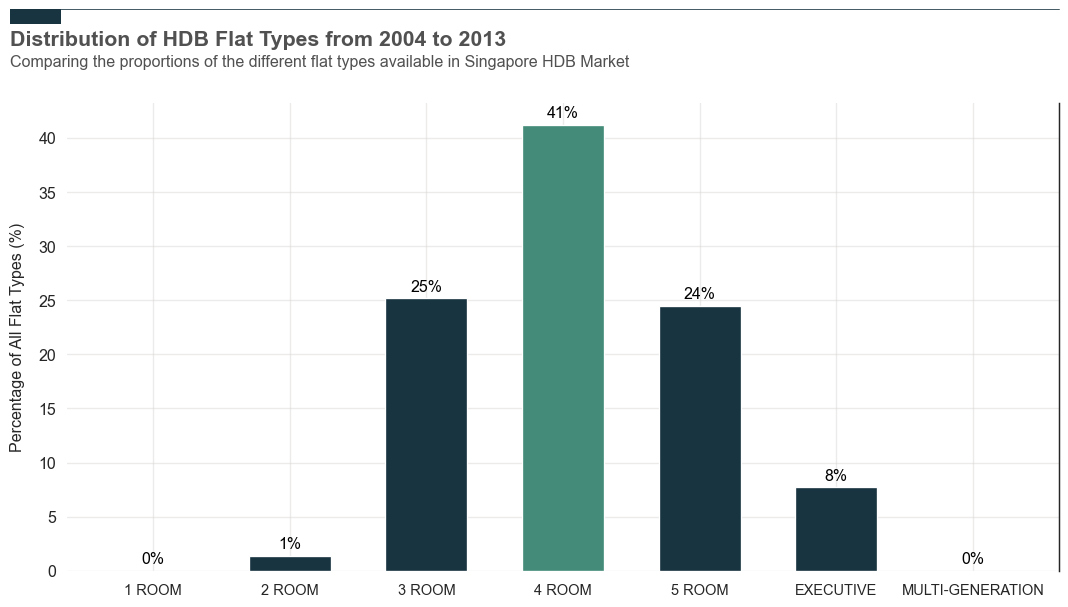

In [55]:
fig, ax = plt.subplots(figsize=(13.33, 7.5), dpi=96)

flat_type_proportion_highest = flat_count_04_13['flat_type_proportion'].max()
colors=['#193441']*len(flat_count_04_13)
for index, row in flat_count_04_13.iterrows():
    if row['flat_type_proportion'] == flat_type_proportion_highest:
        colors[index] = '#448c79'
    else:
        colors[index] = '#193441'

# Plot bars
bar1 = ax.bar(flat_count_04_13['flat_type'], flat_count_04_13['flat_type_proportion'], width=0.6, color=colors)
# Grid
ax.grid(which="major", axis='x', color='#DAD8D7', alpha=0.5, zorder=1)
ax.grid(which="major", axis='y', color='#DAD8D7', alpha=0.5, zorder=1)

# Label x-axis and x ticks
ax.set_xlabel('', fontsize=12, labelpad=10) # No need for an axis label
ax.xaxis.set_label_position("bottom")
# ax.xaxis.set_major_formatter(lambda s, i : f'{s:,.0f}')
# ax.xaxis.set_major_locator(MaxNLocator(integer=True))
# ax.xaxis.set_tick_params(pad=2, labelbottom=True, bottom=True, labelsize=12, labelrotation=0)
# labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
# ax.set_xticks(delay_by_month['Month'], labels) # Map integers numbers from the series to labels list

# Reformat y-axis
ax.set_ylabel('Percentage of All Flat Types (%)', fontsize=12, labelpad=10)
ax.yaxis.set_label_position("left")
ax.yaxis.set_major_formatter(lambda s, i : f'{s:,.0f}')
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_tick_params(pad=2, labeltop=False, labelbottom=True, bottom=False, labelsize=12)

# Add label on top of each bar
ax.bar_label(bar1, labels=[f'{e:,.0f}%' for e in flat_count_04_13['flat_type_proportion']], padding=3, color='black', fontsize=12) 

# Remove the spines
ax.spines[['top','left','bottom']].set_visible(False)

# Make the left spine thicker
ax.spines['right'].set_linewidth(1.1)

# Add in red line and rectangle on top
ax.plot([0.08, .9], [.98, .98], transform=fig.transFigure, clip_on=False, color='#193441', linewidth=.6)
ax.add_patch(plt.Rectangle((0.08,.98), 0.04, -0.02, facecolor='#193441', transform=fig.transFigure, clip_on=False, linewidth = 0))

# Add in title and subtitle
ax.text(x=0.08, y=.93, s="Distribution of HDB Flat Types from 2013 to 2023", transform=fig.transFigure, ha='left', fontsize=16, weight='bold', alpha=.8)
ax.text(x=0.08, y=.90, s="Comparing the proportions of the different flat types available in Singapore HDB Market", transform=fig.transFigure, ha='left', fontsize=12, alpha=.8)

# Adjust the margins around the plot area
plt.subplots_adjust(left=None, bottom=0.2, right=None, top=0.85, wspace=None, hspace=None)

# Set a white background
fig.patch.set_facecolor('white')

For both time blocks (2004 to 2013, and 2013 to 2023):
 proportionately very few 1 room, 2 rooms and multi-generation flat types. They will be removed for looking at flat types.


keep only the following flat types:
- 3 Room
- 4 Room
- 5 Room
- Executive

In [56]:
print('Unique flat types before removing:', hdb_price_df_13_23['flat_type'].unique(),'\n')
keep_flat_type = ['3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE']
hdb_price_df_13_23 = hdb_price_df_13_23[hdb_price_df_13_23['flat_type'].isin(keep_flat_type)]
print('Unique flat types after removing 1 rooms, 2 rooms and multi-generation flat types:',hdb_price_df_13_23['flat_type'].unique())

# do the same for 2013 to 2023
hdb_price_df_13_23 = hdb_price_df_13_23[hdb_price_df_13_23['flat_type'].isin(keep_flat_type)]

# do the same for 2013 to 2023
hdb_price_df = hdb_price_df[hdb_price_df['flat_type'].isin(keep_flat_type)]


Unique flat types before removing: ['4 ROOM' '5 ROOM' '3 ROOM' 'EXECUTIVE' '2 ROOM' '1 ROOM'
 'MULTI-GENERATION'] 

Unique flat types after removing 1 rooms, 2 rooms and multi-generation flat types: ['4 ROOM' '5 ROOM' '3 ROOM' 'EXECUTIVE']


#### Distribution of Resale Prices of Flat Types by Year

In [57]:
# create new feature flat_type_year
def get_year(x):
    return str(x)[:4]

hdb_price_df_13_23['flat_type_year'] = hdb_price_df_13_23['flat_type'] + ' - ' + hdb_price_df_13_23['month'].apply(lambda x: str(x)[:4])
hdb_price_df_13_23.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,...,good_sch_count_within_1km,good_sch_list_within_1km,good_sch_score,good_sch_score_sap_gep,distance_to_cbd_km,matured,year,CPI,adjusted_price,flat_type_year
0,2023-03-01,BISHAN,4 ROOM,289,BISHAN ST 24,22 TO 24,103.0,Premium Apartment,1998,74.333333,...,1,['Catholic High School'],3,2,7.635584,1,2023,NaN,750388.000000,4 ROOM - 2023
1,2022-12-01,BISHAN,4 ROOM,289,BISHAN ST 24,22 TO 24,102.0,Premium Apartment,1998,74.583333,...,1,['Catholic High School'],3,2,7.635584,1,2022,111.186,764484.737287,4 ROOM - 2022
2,2022-11-01,BISHAN,4 ROOM,289,BISHAN ST 24,16 TO 18,102.0,Premium Apartment,1998,74.666667,...,1,['Catholic High School'],3,2,7.635584,1,2022,110.959,683135.212105,4 ROOM - 2022
3,2022-06-01,BISHAN,5 ROOM,289,BISHAN ST 24,07 TO 09,121.0,Premium Apartment,1998,75.083333,...,1,['Catholic High School'],3,2,7.635584,1,2022,108.671,809783.658934,5 ROOM - 2022
4,2021-12-01,BISHAN,4 ROOM,289,BISHAN ST 24,07 TO 09,102.0,Premium Apartment,1998,75.583333,...,1,['Catholic High School'],3,2,7.635584,1,2021,104.439,579285.515947,4 ROOM - 2021


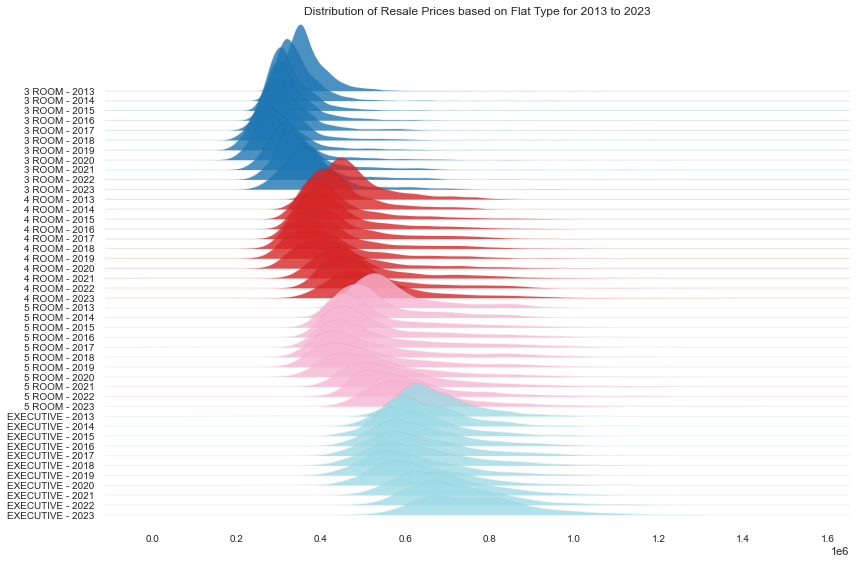

In [58]:
fig, axes = joypy.joyplot(hdb_price_df_13_23,
                            by='flat_type_year',
                            column='adjusted_price',
                            figsize=(12,8),
                            title='Distribution of Resale Prices based on Flat Type for 2013 to 2023',
                            linewidth=0.05,
                            overlap=1.5,
                            alpha=0.8,
                            colormap=plt.cm.get_cmap('tab20',4))

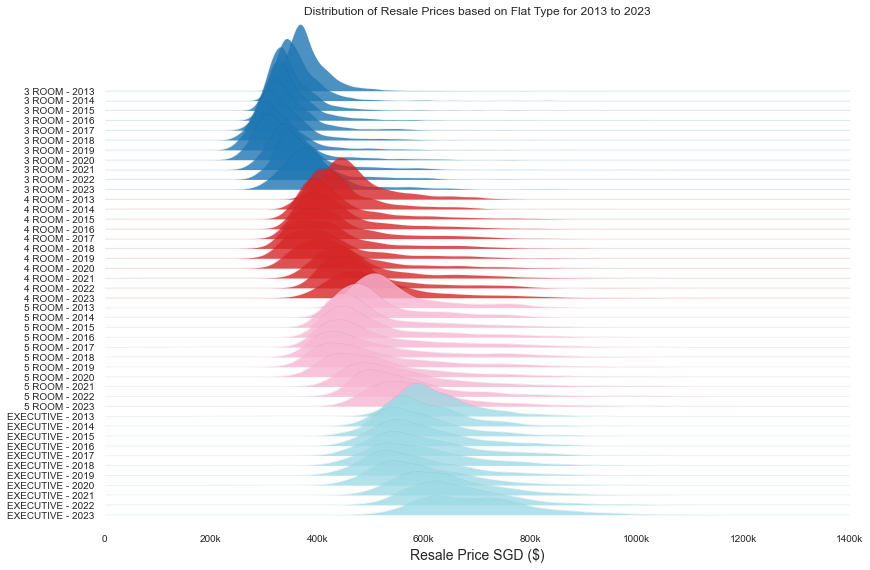

In [59]:
# visualize using joypy library
import joypy

# time block: 2013 to 2023
fig, axes = joypy.joyplot(hdb_price_df_13_23,
                            by='flat_type_year',
                            column='adjusted_price',
                            figsize=(12,8),
                            title='Distribution of Resale Prices based on Flat Type for 2013 to 2023',
                            linewidth=0.05,
                            overlap=1.5,
                            alpha=0.8,
                            colormap=plt.cm.get_cmap('tab20',4))

axes[-1].set_xlim([0, 1400000])
axes[-1].set_xticklabels(['0', '200k', '400k', '600k', '800k', '1000k', '1200k', '1400k', '1600k']) 
plt.xlabel('Resale Price SGD ($)', fontsize=14)

plt.show()

2 observations from the above ridgeline plot:
1. Consistent pattern that HDB flats with more rooms tend to fetch higher resale prices, unsurprising.

2. Looking at how prices vary for the same number of rooms, from 2004 to 2013, HDB resale prices generally increase over the years for the same flat type. 
However, from 2013 to 2023, distribution of prices remain similar over the years.


## By Town

### Time Block: 2013 to 2013

In [60]:
# all room types
hdb_price_df_13_23['year'] = pd.DatetimeIndex(hdb_price_df_13_23['month']).year # extract out year
town_prices_04_13 = hdb_price_df_13_23.groupby(['town'], as_index=False).agg({'adjusted_price': 'median'}).sort_values('adjusted_price', ascending=True).reset_index(drop=True)
town_prices_04_13['adjusted_price'] = round(town_prices_04_13['adjusted_price']/1000) # convert prices in terms of SGD1000 for easier visualization since prices are all in '000s

town_prices_04_13

,town,adjusted_price
0,ANG MO KIO,370.0
1,YISHUN,372.0
2,BUKIT BATOK,386.0
3,BEDOK,390.0
4,GEYLANG,399.0
5,WOODLANDS,403.0
6,JURONG EAST,406.0
7,TOA PAYOH,415.0
8,SEMBAWANG,417.0
9,JURONG WEST,418.0


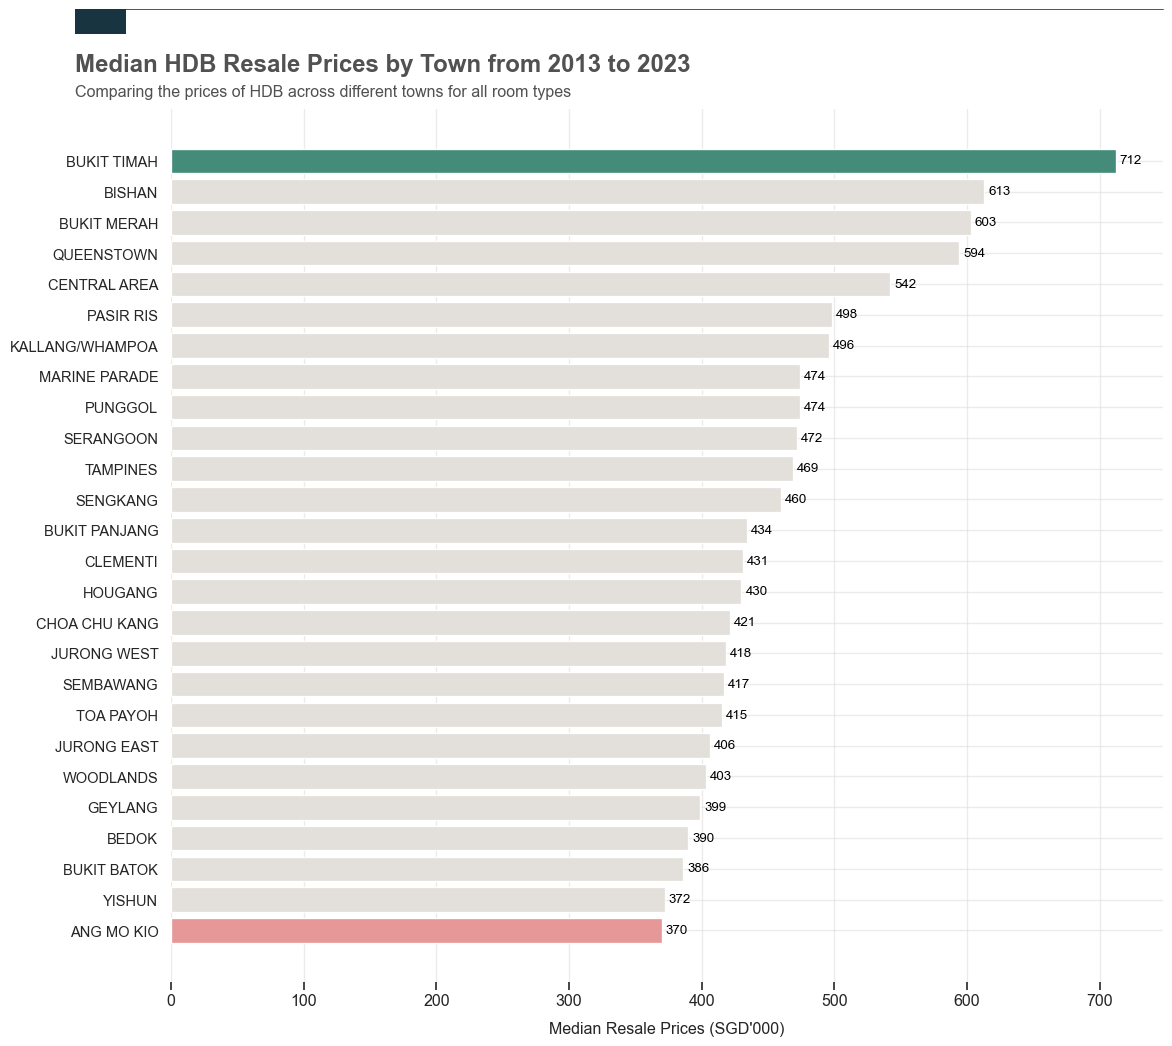

In [61]:
fig, ax = plt.subplots(figsize=(13.33, 13), dpi=96)

lowest_median_price, highest_median_price = town_prices_04_13['adjusted_price'].min(), town_prices_04_13['adjusted_price'].max()
colors=['#e3dfda']*len(town_prices_04_13)
# set to lowest and highest prices to red and green respectively
for index, row in town_prices_04_13.iterrows():
    if row['adjusted_price'] == lowest_median_price:
        colors[index] = '#e69798'
    if row['adjusted_price'] == highest_median_price:
        colors[index] = '#448c79'

# Plot bars
bar1=ax.barh(town_prices_04_13['town'], town_prices_04_13['adjusted_price'], color=colors)

# Grid
ax.grid(which="major", axis='x', alpha = 0.5,color='#DAD8D7', zorder=1)
ax.grid(which="major", axis='y', alpha=0.5, color='#DAD8D7', zorder=1)

# Label x-axis and x ticks
ax.set_xlabel("Median Resale Prices (SGD'000)", fontsize=12, labelpad=10) 
#ax.xaxis.set_label_position("bottom")
#ax.xaxis.set_major_formatter(lambda s, i : f'{s:,.0f}')
#ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.xaxis.set_tick_params(pad=2, labelbottom=True, bottom=True, labelsize=12, labelrotation=0)
# labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
# ax.set_xticks(delay_by_month['Month'], labels) # Map integers numbers from the series to labels list

# Reformat y-axis
#ax.set_ylabel('Town', fontsize=12, labelpad=10)
#ax.yaxis.set_label_position("left")
# ax.yaxis.set_major_formatter(lambda s, i : f'{s:,.0f}')
# ax.yaxis.set_major_locator(MaxNLocator(integer=True))
# ax.yaxis.set_tick_params(pad=2, labeltop=False, labelbottom=True, bottom=False, labelsize=12)

# Add label on top of each bar
ax.bar_label(bar1, labels=[f'{e:,.0f}' for e in town_prices_04_13['adjusted_price']], padding=3, color='black', fontsize=10) 

# Remove the spines
# actual submission - ax.spines[['top','left','bottom']].set_visible(False)
ax.spines[['top','left','bottom', 'right']].set_visible(False)

# Make the left spine thicker
# actual submission - ax.spines['right'].set_linewidth(1.1)

# Add in red line and rectangle on top
ax.plot([0.05, .9], [.98, .98], transform=fig.transFigure, clip_on=False, color='#193441', linewidth=.6)
ax.add_patch(plt.Rectangle((0.05,.98), 0.04, -0.02, facecolor='#193441', transform=fig.transFigure, clip_on=False, linewidth = 0))

# Add in title and subtitle
ax.text(x=0.05, y=.93, s="Median HDB Resale Prices by Town from 2013 to 2023", transform=fig.transFigure, ha='left', fontsize=18, weight='bold', alpha=.8)
ax.text(x=0.05, y=.91, s="Comparing the prices of HDB across different towns for all room types", transform=fig.transFigure, ha='left', fontsize=12, alpha=.8)

# Adjust the margins around the plot area
plt.subplots_adjust(left=None, bottom=0.2, right=None, top=0.9, wspace=None, hspace=None)

plt.show()

### 2004 vs 2022 (Now): Percentage Change of Resale Prices by Town 

In [62]:
# all room types
town_prices_04_22 = hdb_price_df[hdb_price_df['year'].isin([2004,2022])].groupby(['town','year'], as_index=False).agg({'adjusted_price': 'median'})
town_prices_04_22['change'] = town_prices_04_22.groupby('town')['adjusted_price'].apply(lambda x: x.pct_change()*100).round() # calculate percentage change between 2004 and 2023
town_prices_04_22 = town_prices_04_22[town_prices_04_22['change'].notnull()] 
town_prices_04_22 = town_prices_04_22.sort_values('change', ascending=True).reset_index(drop=True).reset_index()
# town_prices_04_23['color'] = town_prices_04_23['change'].apply(lambda x: '#00ba38' if x > 0 else '#f8766d')
town_prices_04_22

,index,town,year,adjusted_price,change


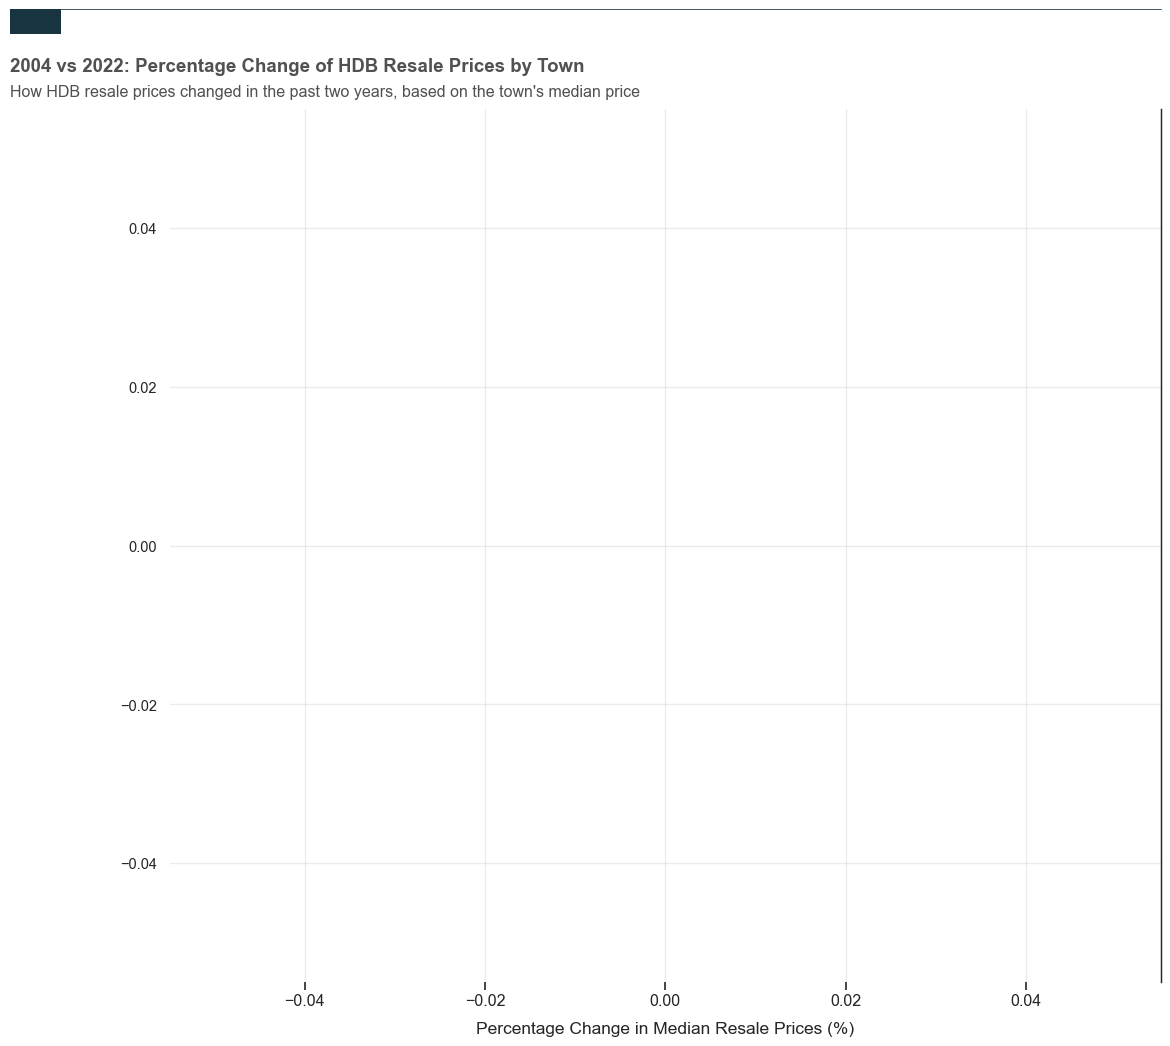

In [63]:
fig, ax = plt.subplots(figsize=(13.33, 13), dpi=96)

smallest_price_change, largest_price_change = town_prices_04_22['change'].min(), town_prices_04_22['change'].max()
colors=['#e3dfda']*len(town_prices_04_22)
# set to lowest and highest prices to red and green respectively
for index, row in town_prices_04_22.iterrows():
    if row['change'] == smallest_price_change:
        colors[index] = '#e69798'
    if row['change'] == largest_price_change:
        colors[index] = '#448c79'

# Plot bars
bar1 = ax.barh(town_prices_04_22['town'], town_prices_04_22['change'], color=colors)

# Grid
ax.grid(which="major", axis='x', color='#DAD8D7', alpha=0.5, zorder=1)
ax.grid(which="major", axis='y', color='#DAD8D7', alpha=0.5, zorder=1)

# Label x-axis and x ticks
ax.set_xlabel("Percentage Change in Median Resale Prices (%)", fontsize=13, labelpad=10) 
#ax.xaxis.set_label_position("bottom")
#ax.xaxis.set_major_formatter(lambda s, i : f'{s:,.0f}')
#ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.xaxis.set_tick_params(pad=2, labelbottom=True, bottom=True, labelsize=12, labelrotation=0)
# labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
# ax.set_xticks(delay_by_month['Month'], labels) # Map integers numbers from the series to labels list

# Reformat y-axis
#ax.set_ylabel('Town', fontsize=12, labelpad=10)
#ax.yaxis.set_label_position("left")
# ax.yaxis.set_major_formatter(lambda s, i : f'{s:,.0f}')
# ax.yaxis.set_major_locator(MaxNLocator(integer=True))
# ax.yaxis.set_tick_params(pad=2, labeltop=False, labelbottom=True, bottom=False, labelsize=12)

# Add label on top of each bar
ax.bar_label(bar1, labels=[f'{e:,.0f}' for e in town_prices_04_22['change']], padding=3, color='black', fontsize=11) 

# Remove the spines
ax.spines[['top','left','bottom']].set_visible(False)

# Make the left spine thicker
ax.spines['right'].set_linewidth(1.1)

# Add in red line and rectangle on top
ax.plot([0, 0.9], [.98, .98], transform=fig.transFigure, clip_on=False, color='#193441', linewidth=.6)
ax.add_patch(plt.Rectangle((0,0.98), 0.04, -0.02, facecolor='#193441', transform=fig.transFigure, clip_on=False, linewidth = 0))

# Add in title and subtitle
ax.text(x=0, y=.93, s="2004 vs 2022: Percentage Change of HDB Resale Prices by Town", transform=fig.transFigure, ha='left', fontsize=14, weight='bold', alpha=.8)
ax.text(x=0, y=.91, s="How HDB resale prices changed in the past two years, based on the town's median price", transform=fig.transFigure, ha='left', fontsize=12, alpha=.8)

# Adjust the margins around the plot area
plt.subplots_adjust(left=None, bottom=0.2, right=None, top=0.9, wspace=None, hspace=None)


plt.show()

It seems like every town's resale price has increased by at least double; estates like queenstown increased in resale prices by more than 300% which is too good to true. Upon further analysis, this is not accurate as 'adjusted_price' did not account for inflation over the past 20 years. Hence we cannot make any conclusions based on the above chart.

### Past Two Years (2021 and 2023): Percentage Change of Resale Prices by Town

In [64]:
town_prices_21_22 = hdb_price_df[hdb_price_df['year'].isin([2021,2022])].groupby(['town','year'], as_index=False).agg({'adjusted_price': 'median'})
town_prices_21_22

,town,year,adjusted_price
0,ANG MO KIO,2021.0,369181.655156
1,ANG MO KIO,2022.0,395947.680293
2,BEDOK,2021.0,426105.545218
3,BEDOK,2022.0,410962.607810
4,BISHAN,2021.0,625248.904819
5,BISHAN,2022.0,643169.539491
6,BUKIT BATOK,2021.0,417844.671574
7,BUKIT BATOK,2022.0,450218.677643
8,BUKIT MERAH,2021.0,628619.511954
9,BUKIT MERAH,2022.0,624537.762297


In [65]:
# all room types
town_prices_21_22 = hdb_price_df[hdb_price_df['year'].isin([2021,2022])].groupby(['town','year'], as_index=False).agg({'adjusted_price': 'median'})
town_prices_21_22['change'] = town_prices_21_22.groupby('town')['adjusted_price'].apply(lambda x: x.pct_change()*100).round() # calculate percentage change between 2004 and 2023
town_prices_21_22 = town_prices_21_22[town_prices_21_22['change'].notnull()] 
town_prices_21_22 = town_prices_21_22.sort_values('change', ascending=True).reset_index(drop=True).reset_index()
town_prices_21_22

,index,town,year,adjusted_price,change
0,0,CENTRAL AREA,2022.0,555236.976962,-16.0
1,1,GEYLANG,2022.0,419613.518655,-13.0
2,2,QUEENSTOWN,2022.0,644864.420804,-7.0
3,3,CLEMENTI,2022.0,489400.846482,-7.0
4,4,MARINE PARADE,2022.0,449443.230573,-6.0
5,5,JURONG EAST,2022.0,418703.294103,-5.0
6,6,BEDOK,2022.0,410962.607810,-4.0
7,7,BUKIT TIMAH,2022.0,659954.263717,-4.0
8,8,SERANGOON,2022.0,495746.454346,-1.0
9,9,BUKIT MERAH,2022.0,624537.762297,-1.0


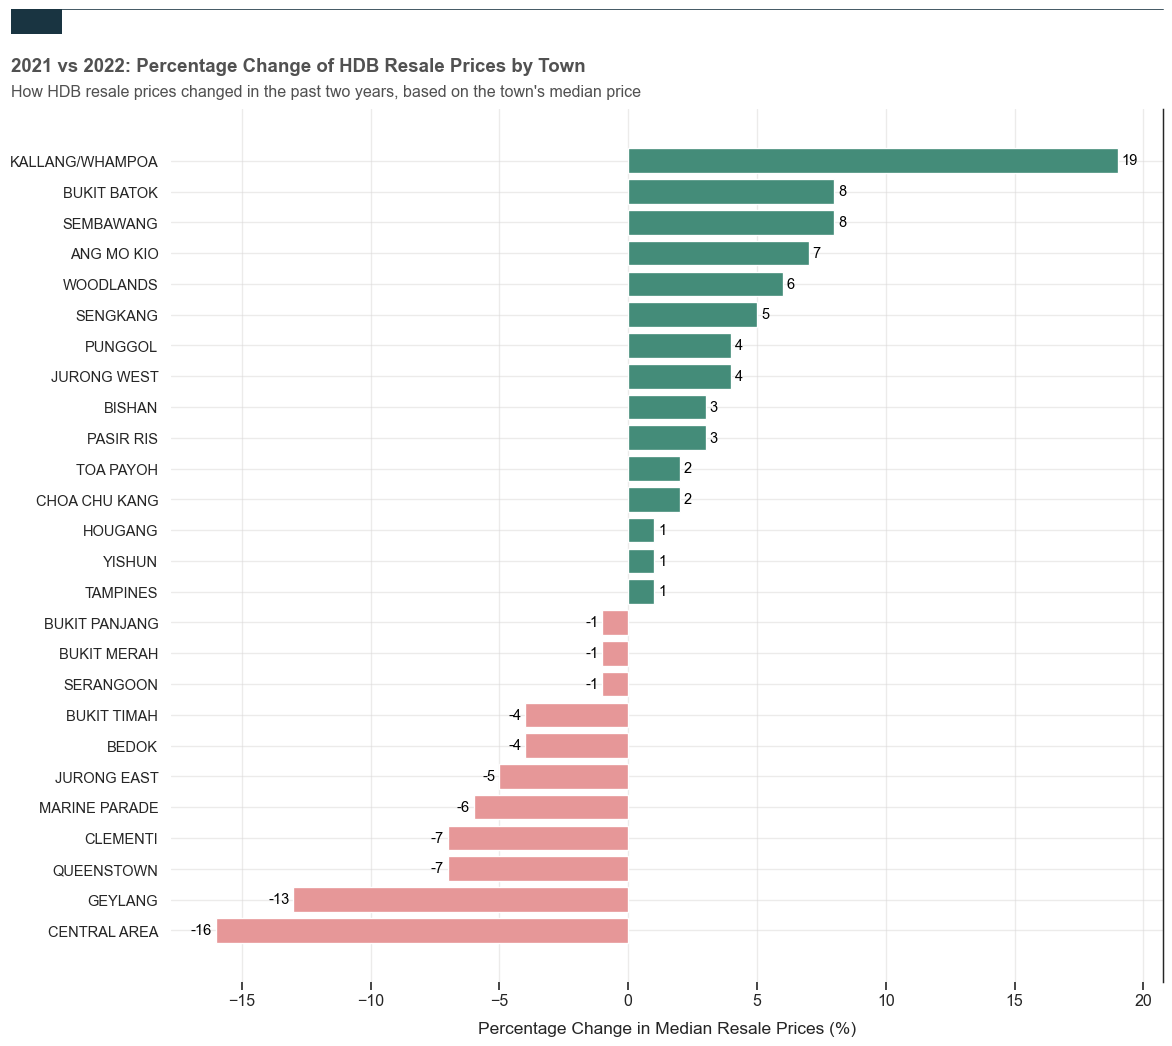

In [66]:
fig, ax = plt.subplots(figsize=(13.33, 13), dpi=96)

# smallest_price_change, largest_price_change = town_prices_21_22['change'].min(), town_prices_21_22['change'].max()
colors=['#e3dfda']*len(town_prices_21_22)
# set to lowest and highest prices to red and green respectively
for index, row in town_prices_21_22.iterrows():
    if row['change'] < 0:
        colors[index] = '#e69798'
    if row['change'] > 0:
        colors[index] = '#448c79'

# Plot bars
bar1 = ax.barh(town_prices_21_22['town'], town_prices_21_22['change'], color=colors)

# Grid
ax.grid(which="major", axis='x', color='#DAD8D7', alpha=0.5, zorder=1)
ax.grid(which="major", axis='y', color='#DAD8D7', alpha=0.5, zorder=1)

# Label x-axis and x ticks
ax.set_xlabel("Percentage Change in Median Resale Prices (%)", fontsize=13, labelpad=10) 
#ax.xaxis.set_label_position("bottom")
#ax.xaxis.set_major_formatter(lambda s, i : f'{s:,.0f}')
#ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.xaxis.set_tick_params(pad=2, labelbottom=True, bottom=True, labelsize=12, labelrotation=0)
# labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
# ax.set_xticks(delay_by_month['Month'], labels) # Map integers numbers from the series to labels list

# Reformat y-axis
#ax.set_ylabel('Town', fontsize=12, labelpad=10)
#ax.yaxis.set_label_position("left")
# ax.yaxis.set_major_formatter(lambda s, i : f'{s:,.0f}')
# ax.yaxis.set_major_locator(MaxNLocator(integer=True))
# ax.yaxis.set_tick_params(pad=2, labeltop=False, labelbottom=True, bottom=False, labelsize=12)

# Add label on top of each bar
ax.bar_label(bar1, labels=[f'{e:,.0f}' for e in town_prices_21_22['change']], padding=3, color='black', fontsize=11) 

# Remove the spines
ax.spines[['top','left','bottom']].set_visible(False)

# Make the left spine thicker
ax.spines['right'].set_linewidth(1.1)

# Add in red line and rectangle on top
ax.plot([0, 0.9], [.98, .98], transform=fig.transFigure, clip_on=False, color='#193441', linewidth=.6)
ax.add_patch(plt.Rectangle((0,0.98), 0.04, -0.02, facecolor='#193441', transform=fig.transFigure, clip_on=False, linewidth = 0))

# Add in title and subtitle
ax.text(x=0, y=.93, s="2021 vs 2022: Percentage Change of HDB Resale Prices by Town", transform=fig.transFigure, ha='left', fontsize=14, weight='bold', alpha=.8)
ax.text(x=0, y=.91, s="How HDB resale prices changed in the past two years, based on the town's median price", transform=fig.transFigure, ha='left', fontsize=12, alpha=.8)

# Adjust the margins around the plot area
plt.subplots_adjust(left=None, bottom=0.2, right=None, top=0.9, wspace=None, hspace=None)


plt.show()

The changes are not very large from 2021 to 2022. Prices have dropped the most (16%) in Central Area for both all room types and 4 rooms compared to the other towns. 
On the other hand, prices in Kallang/Whampoa have increased the most for both all room types as well as 4-room. 

Could it be because these areas have older HDB meaning their lease are now shorter? As shown below, it seems that places like Punggol, and Sengkang, tend to have later lease commence date, as they were developed later, which might have led to their slight increase in prices, while places like Toa Payoh and Central Area, tend to have older lease commence date.

In [67]:
hdb_price_df[hdb_price_df['year'].isin([2021,2022])].groupby('town')['lease_commence_date'].median().sort_values()

town
MARINE PARADE      1975.0
ANG MO KIO         1980.0
BEDOK              1981.0
CLEMENTI           1981.0
GEYLANG            1983.0
TOA PAYOH          1984.0
CENTRAL AREA       1985.0
JURONG EAST        1985.0
SERANGOON          1986.0
KALLANG/WHAMPOA    1987.0
BUKIT BATOK        1987.0
YISHUN             1988.0
BISHAN             1988.0
TAMPINES           1988.0
BUKIT TIMAH        1988.0
HOUGANG            1992.0
PASIR RIS          1994.0
BUKIT MERAH        1995.0
WOODLANDS          1998.0
JURONG WEST        1998.0
BUKIT PANJANG      2001.0
SEMBAWANG          2002.0
CHOA CHU KANG      2002.0
QUEENSTOWN         2006.0
SENGKANG           2012.0
PUNGGOL            2015.0
Name: lease_commence_date, dtype: float64

## By Storeys

In [68]:
storey_04_13 = hdb_price_df_13_23.groupby('storey_range')['adjusted_price'].median().reset_index().sort_values(by='storey_range')

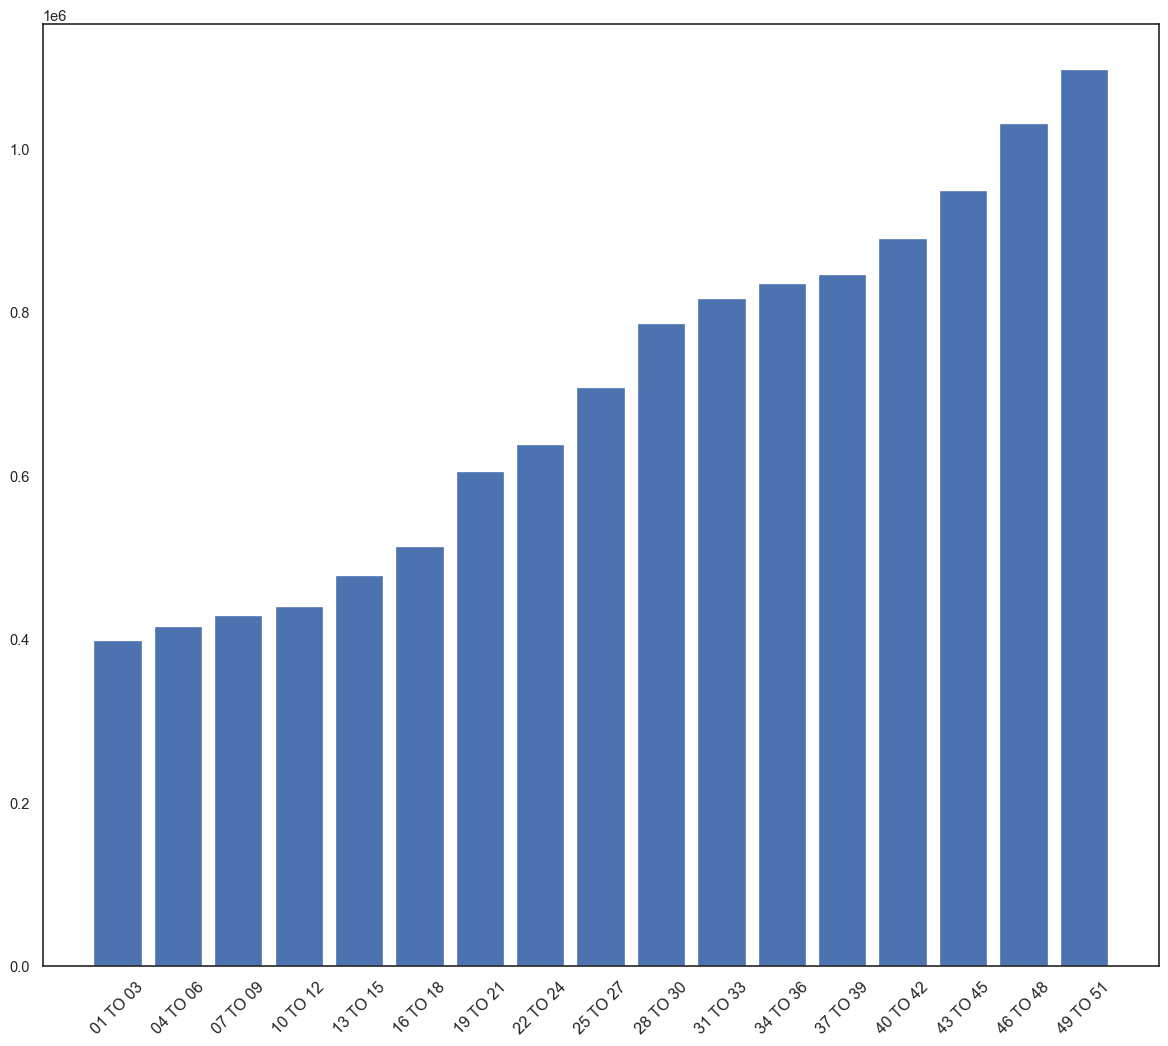

In [69]:
fig, ax = plt.subplots(figsize=(15, 13), dpi=96)

plt.bar(storey_04_13['storey_range'], storey_04_13['adjusted_price'])
plt.xticks(rotation=45,fontsize=12)
plt.show()

In [70]:
# Storey Prices for 2004 to 2013
storey_0413 = hdb_price_df_13_23.groupby('storey_range')['adjusted_price'].median().reset_index().sort_values(by='storey_range')
storey_0413['storey_rank'] = storey_0413['storey_range'].astype('category').cat.codes + 1 # label encode storey -> give each storey range a rank
storey_0413

,storey_range,adjusted_price,storey_rank
0,01 TO 03,3.991958e+05,1
1,04 TO 06,4.158025e+05,2
2,07 TO 09,4.298780e+05,3
3,10 TO 12,4.405063e+05,4
4,13 TO 15,4.789369e+05,5
5,16 TO 18,5.139515e+05,6
6,19 TO 21,6.057180e+05,7
7,22 TO 24,6.393034e+05,8
8,25 TO 27,7.079750e+05,9
9,28 TO 30,7.865203e+05,10


In [71]:
storey_0413['rolling_adjusted_price'] = storey_0413['adjusted_price'].rolling(window=3).mean()
storey_0413

,storey_range,adjusted_price,storey_rank,rolling_adjusted_price
0,01 TO 03,3.991958e+05,1,NaN
1,04 TO 06,4.158025e+05,2,NaN
2,07 TO 09,4.298780e+05,3,4.149588e+05
3,10 TO 12,4.405063e+05,4,4.287290e+05
4,13 TO 15,4.789369e+05,5,4.497737e+05
5,16 TO 18,5.139515e+05,6,4.777982e+05
6,19 TO 21,6.057180e+05,7,5.328688e+05
7,22 TO 24,6.393034e+05,8,5.863243e+05
8,25 TO 27,7.079750e+05,9,6.509988e+05
9,28 TO 30,7.865203e+05,10,7.112662e+05


In [72]:
colors = ['#193441']*len(storey_0413)
for index, row in storey_0413.iterrows():
    if row['adjusted_price'] > 700000:
        colors[index] = '#e69798'
storey_0413

,storey_range,adjusted_price,storey_rank,rolling_adjusted_price
0,01 TO 03,3.991958e+05,1,NaN
1,04 TO 06,4.158025e+05,2,NaN
2,07 TO 09,4.298780e+05,3,4.149588e+05
3,10 TO 12,4.405063e+05,4,4.287290e+05
4,13 TO 15,4.789369e+05,5,4.497737e+05
5,16 TO 18,5.139515e+05,6,4.777982e+05
6,19 TO 21,6.057180e+05,7,5.328688e+05
7,22 TO 24,6.393034e+05,8,5.863243e+05
8,25 TO 27,7.079750e+05,9,6.509988e+05
9,28 TO 30,7.865203e+05,10,7.112662e+05


C:\Users\raych\AppData\Local\Temp\ipykernel_20760\1610784531.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  scatter1.set_yticklabels(ylabels)


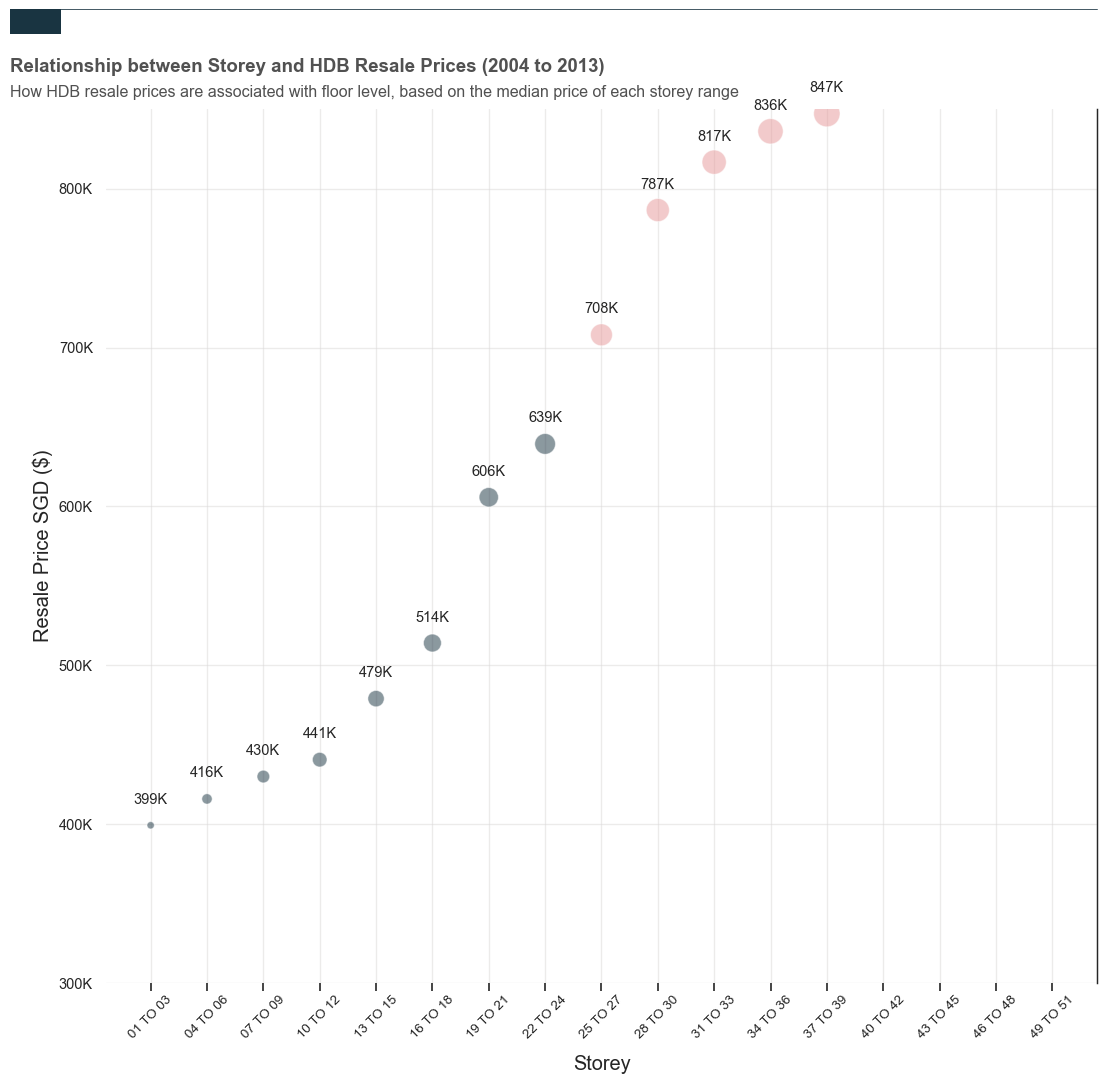

In [73]:
fig, ax = plt.subplots(figsize=(13.33, 13), dpi=96)

scatter1=sns.scatterplot(x=storey_0413['storey_range'], y=storey_0413['adjusted_price'], s=storey_0413['storey_rank'].astype('int')*30, sizes=(20,200),color=colors, edgecolors='w', alpha=0.5, ax=ax)
# ax.plot(storey_0413['storey_range'], storey_0413['rolling_adjusted_price'])
# sns.regplot(x='storey_range', y='adjusted_price', data=storey_0413, lowess=True)

# Grid
ax.grid(which="major", axis='x', color='#DAD8D7', alpha=0.5, zorder=1)
ax.grid(which="major", axis='y', color='#DAD8D7', alpha=0.5, zorder=1)

# Label data points
for i, row in storey_0413.iterrows():
    # offset = row['storey_rank'] / 50
    label = str(round(row['adjusted_price']/1000)) + 'K'
    plt.annotate(label, xy=(row['storey_range'], row['adjusted_price']), ha='center', va='bottom', xytext=(0, 14), textcoords='offset points', fontsize=11)

# Label x-axis and x ticks
ax.set_xlabel("Percentage Change in Median Resale Prices (%)", fontsize=12, labelpad=10) 
ax.xaxis.set_tick_params(pad=2, labelbottom=True, bottom=True, labelsize=12, labelrotation=0)
plt.xticks(rotation=45, fontsize=10)

# Reformat y-axis
ylabels = ['{:,.0f}'.format(x) + 'K' for x in scatter1.get_yticks()/1000]
scatter1.set_yticklabels(ylabels)
scatter1.set_ylim([300000,850000])
scatter1.set_ylabel('Resale Price SGD ($)', size=15)
scatter1.set_xlabel('Storey', size=15)

# Remove the spines
ax.spines[['top','left','bottom']].set_visible(False)

# Make the left spine thicker
ax.spines['right'].set_linewidth(1.1)

# Add in red line and rectangle on top
ax.plot([0.05, .9], [.98, .98], transform=fig.transFigure, clip_on=False, color='#193441', linewidth=.6)
ax.add_patch(plt.Rectangle((0.05,.98), 0.04, -0.02, facecolor='#193441', transform=fig.transFigure, clip_on=False, linewidth = 0))

# Add in title and subtitle
ax.text(x=0.05, y=.93, s="Relationship between Storey and HDB Resale Prices (2004 to 2013)", transform=fig.transFigure, ha='left', fontsize=14, weight='bold', alpha=.8)
ax.text(x=0.05, y=.91, s="How HDB resale prices are associated with floor level, based on the median price of each storey range", transform=fig.transFigure, ha='left', fontsize=12, alpha=.8)

# Adjust the margins around the plot area
plt.subplots_adjust(left=None, bottom=0.2, right=None, top=0.9, wspace=None, hspace=None)

plt.show()


## By Floor Area

C:\Users\raych\AppData\Local\Temp\ipykernel_20760\2099403600.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  p.set_yticklabels(ylabels)


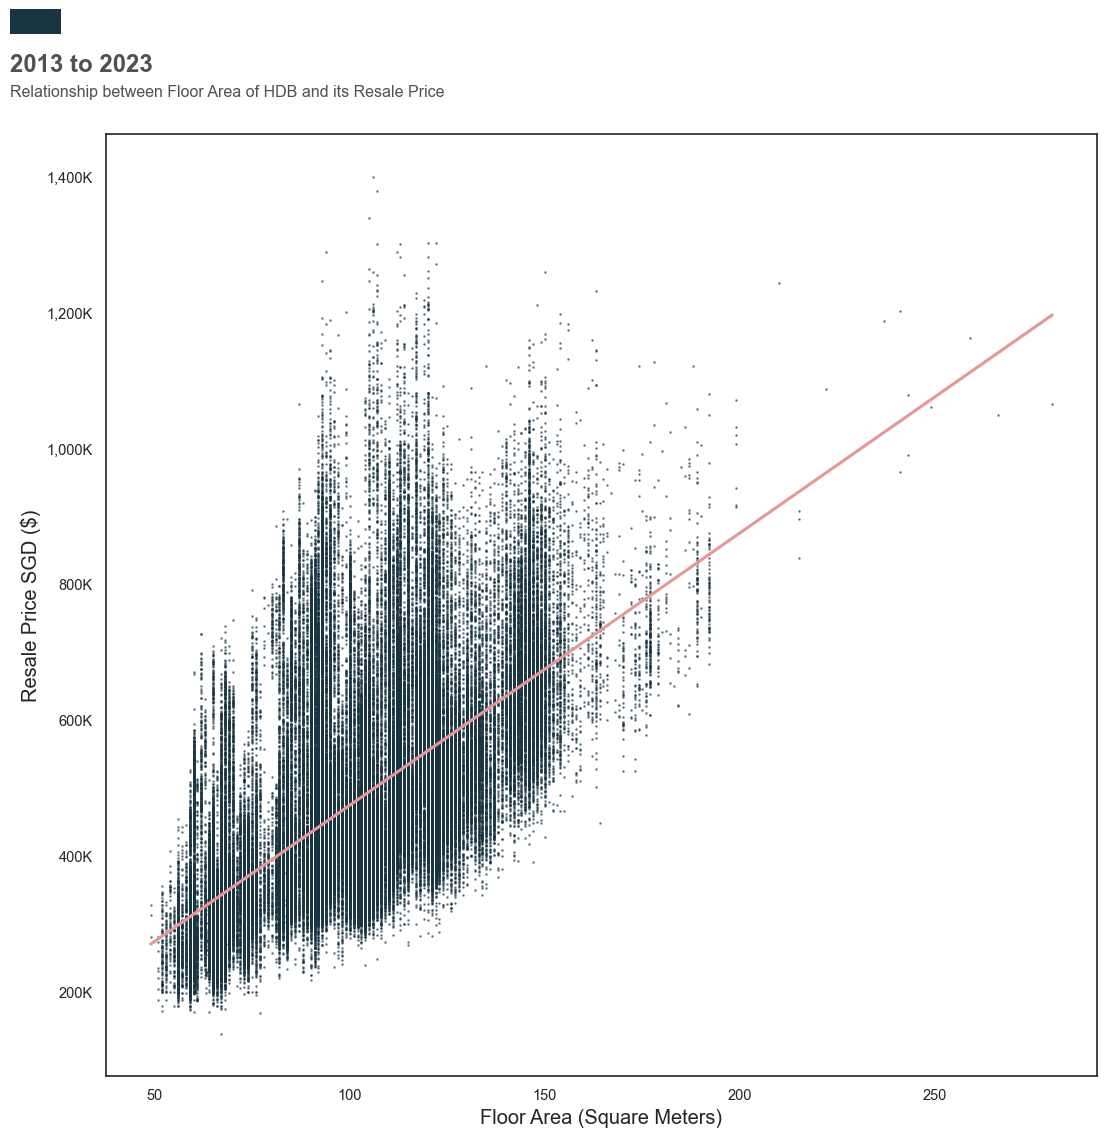

In [74]:
fig, ax = plt.subplots(figsize=(13.33, 13), dpi=96)

# 2013 to 2023
p=sns.regplot(x='floor_area_sqm', y='adjusted_price', data=hdb_price_df_13_23, color='#e69798', scatter_kws={"s": 1, 'alpha':0.5, 'color':'#193441'})
ylabels = ['{:,.0f}'.format(x) + 'K' for x in p.get_yticks()/1000]
p.set_yticklabels(ylabels)
p.set_ylabel('Resale Price SGD ($)', size=15)
p.set_xlabel('Floor Area (Square Meters)', size=15)

# Add in red line and rectangle on top
# ax.plot([0.05, .9], [.98, .98], transform=fig.transFigure, clip_on=False, color='#193441', linewidth=.6)
ax.add_patch(plt.Rectangle((0.05,.98), 0.04, -0.02, facecolor='#193441', transform=fig.transFigure, clip_on=False, linewidth = 0))

# Add in title and subtitle
ax.text(x=0.05, y=.93, s="2013 to 2023", transform=fig.transFigure, ha='left', fontsize=18, weight='bold', alpha=.8)
ax.text(x=0.05, y=.91, s="Relationship between Floor Area of HDB and its Resale Price", transform=fig.transFigure, ha='left', fontsize=12, alpha=.8)

plt.show()

#### Using Median Prices for each Floor Area

In [75]:
floor_area_04_13 = hdb_price_df_13_23.groupby(['floor_area_sqm'], as_index=False).agg({'adjusted_price':'median'})
floor_area_04_13 # 167 data points

,floor_area_sqm,adjusted_price
0,49.0,3.138981e+05
1,51.0,2.483005e+05
2,52.0,2.534228e+05
3,53.0,2.531646e+05
4,54.0,2.973370e+05
...,...,...
154,243.0,1.034958e+06
155,249.0,1.062119e+06
156,259.0,1.163332e+06
157,266.0,1.050334e+06


C:\Users\raych\AppData\Local\Temp\ipykernel_20760\534261798.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  p.set_yticklabels(ylabels)


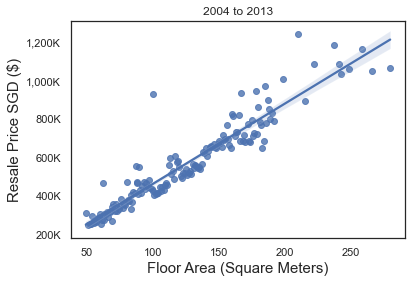

In [76]:
p =sns.regplot(x='floor_area_sqm',y='adjusted_price', data=floor_area_04_13)
ylabels = ['{:,.0f}'.format(x) + 'K' for x in p.get_yticks()/1000]
p.set_yticklabels(ylabels)
p.set_ylabel('Resale Price SGD ($)', size=15)
p.set_xlabel('Floor Area (Square Meters)', size=15)
p.set_title('2004 to 2013')
plt.show()

Observation: As floor area (in sqm) increases, resale price generally increases.
majority of HDB transactions have floor area between 50 to close to 200 sqm. 

In [77]:
# what are those HDBs which have bigger than 200 sqm of floor area
hdb_price_df_13_23[hdb_price_df_13_23['floor_area_sqm'] > 200]['flat_model']
# flat models which have huge floor area are mostly terrace and (premium) maisonette, not suprising

60377                Terrace
129486    Premium Maisonette
142685               Terrace
155438               Terrace
157856            Maisonette
180213            Maisonette
194665    Premium Maisonette
198794               Terrace
213100               Terrace
213103               Terrace
213106               Terrace
213985               Terrace
215420               Terrace
217036               Terrace
Name: flat_model, dtype: object

## By Block Number

3 digit system was introduced in the 1970s, with the 1st digit representing a neighbourhood in a town. So for e.g., AMK neighbourhood 1 starts with 101, and AMK neighbourhood 2 starts with 201. So first digit was separated from last 2 digits and plotted separately

C:\Users\raych\AppData\Local\Temp\ipykernel_20760\3102045105.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(ylabels)
C:\Users\raych\AppData\Local\Temp\ipykernel_20760\3102045105.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(ylabels)


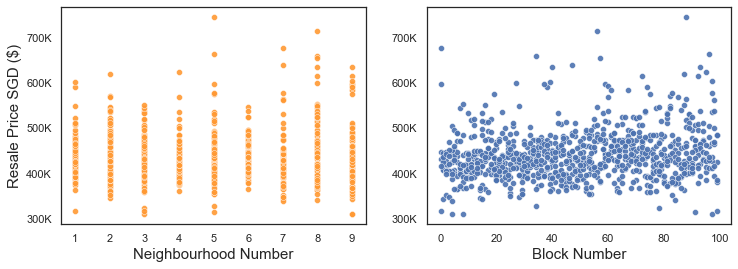

In [78]:
import re

# 2004 to 2013

# Block Number Prices
get_num = lambda x: int(re.findall("\d+", x)[0])
hdb_price_df_13_23['blocknum'] = hdb_price_df_13_23['block'].apply(get_num) # get only digits from block number
tmp = hdb_price_df_13_23[hdb_price_df_13_23['blocknum'] > 99] # get only blocks that use 3-digit numbering system
tmp = tmp.groupby('blocknum')['adjusted_price'].median().reset_index()

# Scatterplots
fig = plt.figure(figsize=(12,4))

ax1 = plt.subplot(121)
a=sns.scatterplot(x=tmp['blocknum'].apply(lambda x: int(str(x)[0])), y=tmp['adjusted_price'], color='#ff9933', edgecolors='w', alpha=0.9)
ylabels = ['{:,.0f}'.format(x) + 'K' for x in a.get_yticks()/1000]
ax1.set_yticklabels(ylabels)
ax1.set_ylabel('Resale Price SGD ($)', size=15), ax1.set_xlabel('Neighbourhood Number', size=15)

ax2 = plt.subplot(122)
b=sns.scatterplot(x=tmp['blocknum'].apply(lambda x: int(str(x)[1:])), y=tmp['adjusted_price'], edgecolors='w', alpha=0.9)
ax2.set_yticklabels(ylabels)
ax2.set_ylabel('', size=15)
ax2.set_xlabel('Block Number', size=15)

plt.show()

block number does not seem to influence HDB resale prices for both time blocks

## By Flat Model box plot

C:\Users\raych\AppData\Local\Temp\ipykernel_20760\131395624.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  p.set_yticklabels(ylabels)


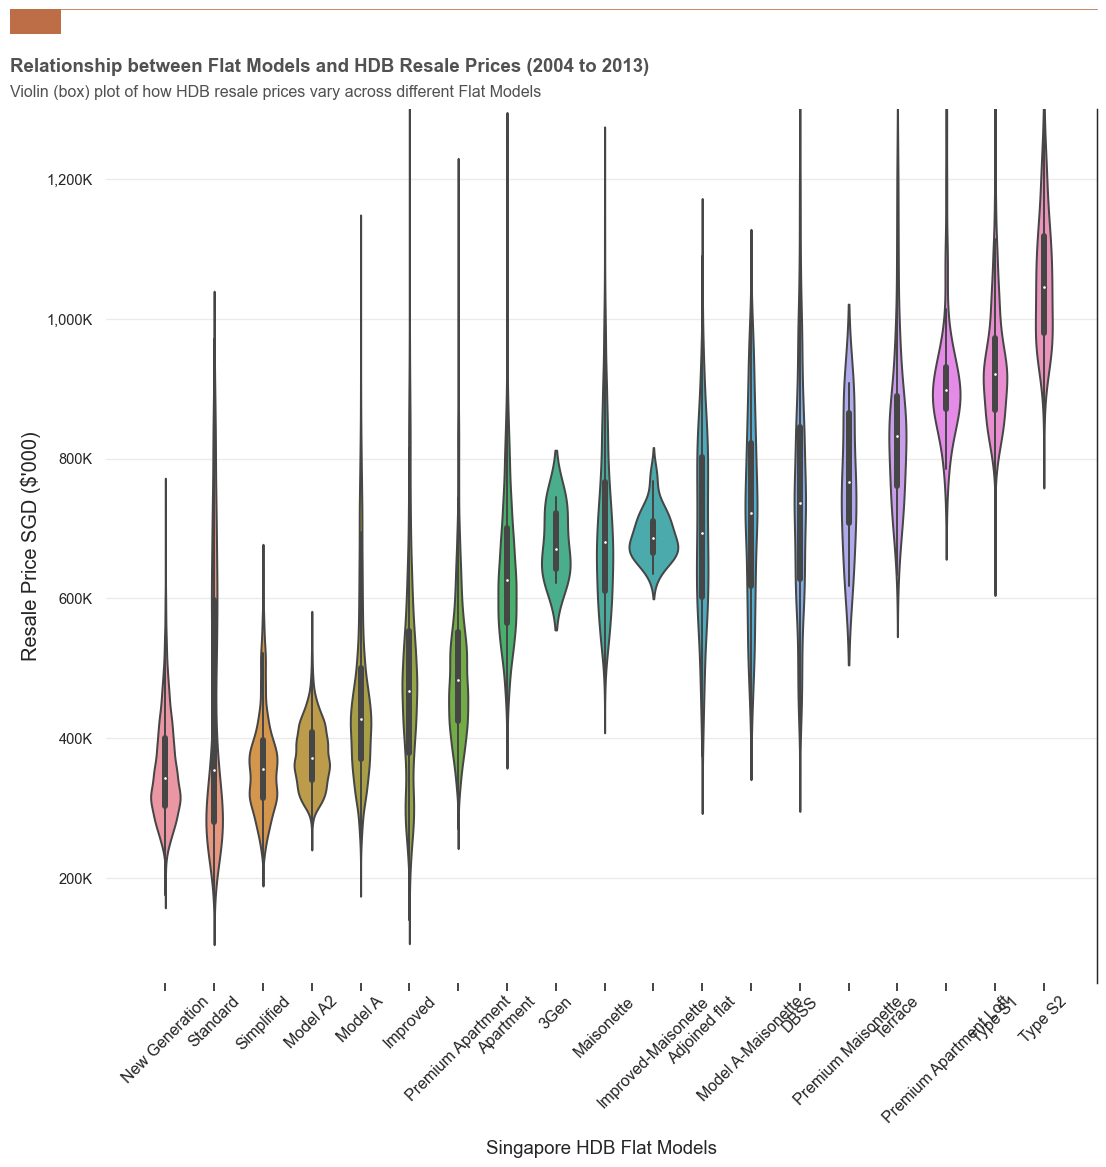

In [79]:
# Violin plots for price distribution of each flat model
fig, ax = plt.subplots(figsize=(13.33, 13), dpi=96)

# Grid
ax.grid(which="major", axis='x', color='#DAD8D7', alpha=0.5, zorder=1)
ax.grid(which="major", axis='y', color='#DAD8D7', alpha=0.5, zorder=1)

p=sns.violinplot(x='flat_model', y='adjusted_price', data=hdb_price_df_13_23, width=1,
                order=hdb_price_df_13_23.groupby('flat_model')['adjusted_price'].median().sort_values().reset_index()['flat_model'].tolist())


# Label x-axis and x ticks
ax.set_xlabel("Singapore HDB Flat Models", fontsize=14, labelpad=10) 
ax.xaxis.set_tick_params(pad=2, labelbottom=True, bottom=True, labelsize=12, labelrotation=0)
plt.xticks(rotation=45, fontsize=12)

# Reformat y-axis
ylabels = ['{:,.0f}'.format(x) + 'K' for x in p.get_yticks()/1000]
p.set_yticklabels(ylabels)
p.set_ylabel("Resale Price SGD ($'000)", size=15)
p.set_ylim([50000,1300000])

# Remove the spines
ax.spines[['top','left','bottom']].set_visible(False)

# Make the left spine thicker
ax.spines['right'].set_linewidth(1.1)

# Add in red line and rectangle on top
ax.plot([0.05, .9], [.98, .98], transform=fig.transFigure, clip_on=False, color='#BE6E46', linewidth=.6)
ax.add_patch(plt.Rectangle((0.05,.98), 0.04, -0.02, facecolor='#BE6E46', transform=fig.transFigure, clip_on=False, linewidth = 0))

# Add in title and subtitle
ax.text(x=0.05, y=.93, s="Relationship between Flat Models and HDB Resale Prices (2004 to 2013)", transform=fig.transFigure, ha='left', fontsize=14, weight='bold', alpha=.8)
ax.text(x=0.05, y=.91, s="Violin (box) plot of how HDB resale prices vary across different Flat Models", transform=fig.transFigure, ha='left', fontsize=12, alpha=.8)

# Adjust the margins around the plot area
plt.subplots_adjust(left=None, bottom=0.2, right=None, top=0.9, wspace=None, hspace=None)

plt.show()

## By Lease Commence Date

C:\Users\raych\AppData\Local\Temp\ipykernel_20760\213327726.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(xlabels)


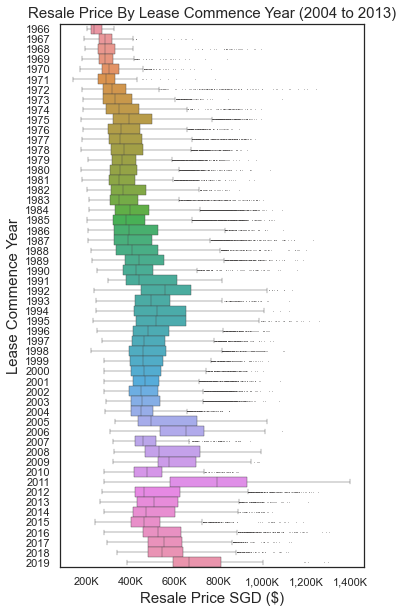

In [80]:
# Boxplot for each year of lease commence date
fig = plt.figure(figsize=(12,10))

# 2004 to 2013
ax1= plt.subplot(121)
a=sns.boxplot(y='lease_commence_date', x='adjusted_price', data=hdb_price_df_13_23, width=1, orient='h', flierprops = dict(markerfacecolor = 'red', markersize = 0.1, linestyle='none'), linewidth=0.4)
ax1.set_xlabel('Resale Price SGD ($)', size=15)
ax1.set_ylabel('Lease Commence Year', size=15)
xlabels = ['{:,.0f}'.format(x) + 'K' for x in a.get_xticks()/1000]
ax1.set_xticklabels(xlabels)
ax1.set_title('Resale Price By Lease Commence Year (2004 to 2013)', size=15)

plt.show()


## By Remaining Lease scatter

In [81]:
hdb_price_df['remaining_lease'].unique()

array([ 85.        ,  86.        ,  87.        ,  88.        ,
        89.        ,  90.        ,  91.        ,  92.        ,
        93.        ,  94.        ,  70.        ,  71.        ,
        72.        ,  73.        ,  74.        ,  75.        ,
        76.        ,  77.        ,  78.        ,  79.        ,
        80.        ,  81.        ,  82.        ,  83.        ,
        84.        ,  65.        ,  66.        ,  67.        ,
        68.        ,  69.        ,  95.        ,  96.        ,
        54.        ,  55.        ,  56.        ,  57.        ,
        58.        ,  59.        ,  60.        ,  61.        ,
        62.        ,  63.        ,  64.        ,  97.        ,
        98.        ,  99.        , 100.        , 101.        ,
        74.33333333,  74.58333333,  74.66666667,  75.08333333,
        75.58333333,  76.5       ,  76.66666667,  76.75      ,
        79.08333333,  80.16666667,  59.41666667,  60.16666667,
        60.33333333,  60.91666667,  60.83333333,  61.08

In [82]:
hdb_price_df['remaining_lease'].nunique() 

661

In [83]:
remaining_lease_04_13 = hdb_price_df_13_23[['remaining_lease','adjusted_price']]
print(remaining_lease_04_13['adjusted_price'].min(),remaining_lease_04_13['adjusted_price'].max())

139610.48674198985 1400000.0


In [84]:
remaining_lease_04_13

,remaining_lease,adjusted_price
0,74.333333,750388.000000
1,74.583333,764484.737287
2,74.666667,683135.212105
3,75.083333,809783.658934
4,75.583333,579285.515947
...,...,...
217186,59.000000,351606.689699
217187,55.000000,355865.392536
217188,66.000000,339813.823214
217189,81.000000,779965.088238


In [85]:
remaining_lease_04_13.nunique()

remaining_lease      658
adjusted_price     54749
dtype: int64

C:\Users\raych\AppData\Local\Temp\ipykernel_20760\2485005643.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  p.set_yticklabels(ylabels)


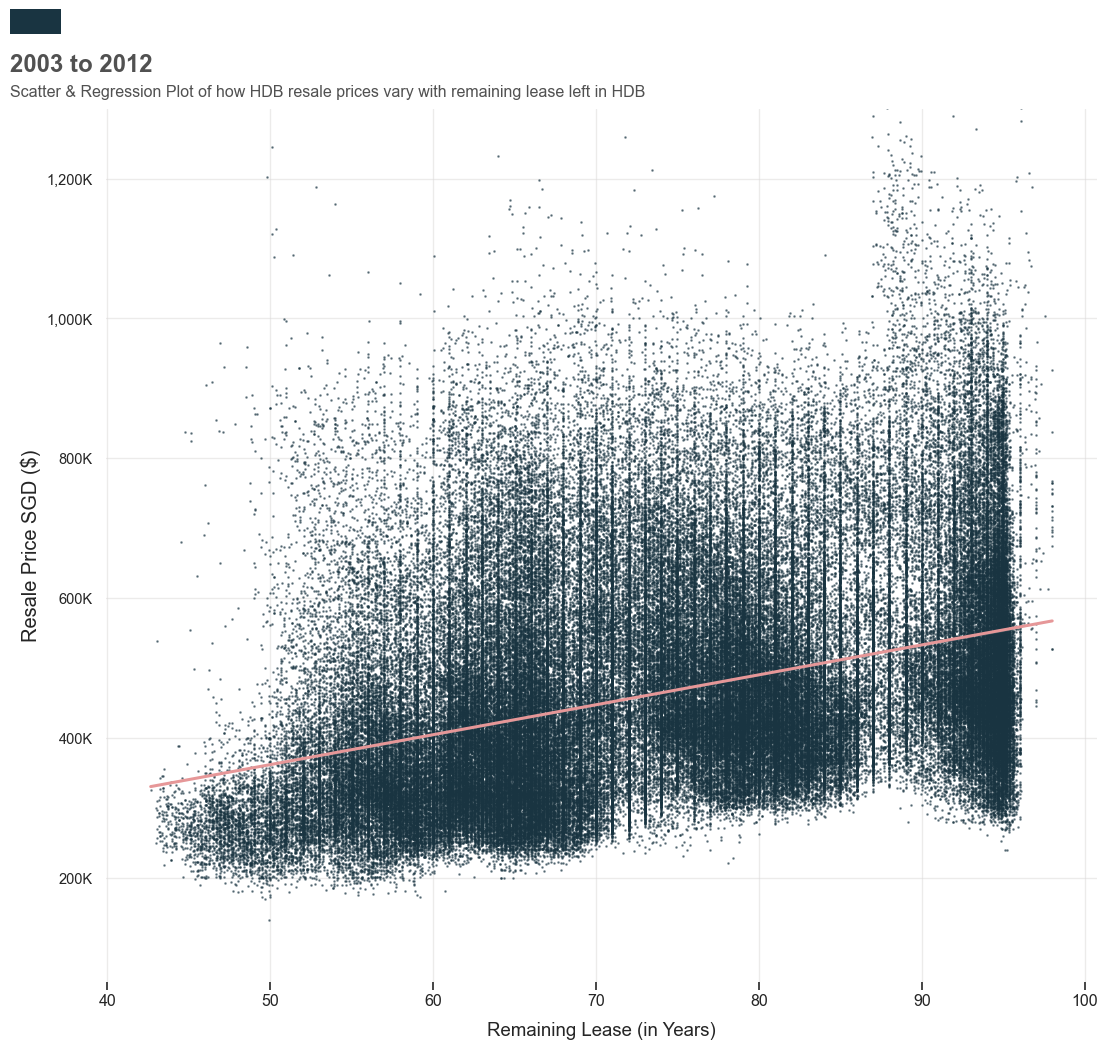

In [86]:
fig, ax = plt.subplots(figsize=(13.33, 13), dpi=96)

# Grid
ax.grid(which="major", axis='x', color='#DAD8D7', alpha=0.5, zorder=1)
ax.grid(which="major", axis='y', color='#DAD8D7', alpha=0.5, zorder=1)

# 2004 to 2013
p=sns.regplot(x='remaining_lease', y='adjusted_price', data=remaining_lease_04_13, color='#e69798', scatter_kws={"s": 1, 'alpha':0.5, 'color':'#193441'})

# Label x-axis and x ticks
ax.set_xlabel("Remaining Lease (in Years)", fontsize=14, labelpad=10) 
ax.xaxis.set_tick_params(pad=2, labelbottom=True, bottom=True, labelsize=12, labelrotation=0)

# Reformat y-axis
p.set_ylabel('Resale Price SGD ($)', size=15)
ylabels = ['{:,.0f}'.format(x) + 'K' for x in p.get_yticks()/1000]
p.set_yticklabels(ylabels)
p.set_ylim([50000,1300000])

# Remove the spines
ax.spines[['top','left','bottom','right']].set_visible(False)

# Make the left spine thicker
# ax.spines['right'].set_linewidth(1.1)

# Add in red line and rectangle on top
# ax.plot([0.05, .9], [.98, .98], transform=fig.transFigure, clip_on=False, color='#193441', linewidth=.6)
ax.add_patch(plt.Rectangle((0.05,.98), 0.04, -0.02, facecolor='#193441', transform=fig.transFigure, clip_on=False, linewidth = 0))

# Add in title and subtitle
ax.text(x=0.05, y=.93, s="2013 to 2023", transform=fig.transFigure, ha='left', fontsize=18, weight='bold', alpha=.8)
ax.text(x=0.05, y=.91, s="Scatter & Regression Plot of how HDB resale prices vary with remaining lease left in HDB", transform=fig.transFigure, ha='left', fontsize=12, alpha=.8)

# Adjust the margins around the plot area
plt.subplots_adjust(left=None, bottom=0.2, right=None, top=0.9, wspace=None, hspace=None)

plt.show()

## By Number of Amenities (MRT, Malls & Good Schools) within 1 km

#### 2004 to 2013

C:\Users\raych\AppData\Local\Temp\ipykernel_20760\2844284413.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0,0].set_yticklabels(ylabels), axes[0,0].set_ylabel('Resale Price SGD ($)', size=10)


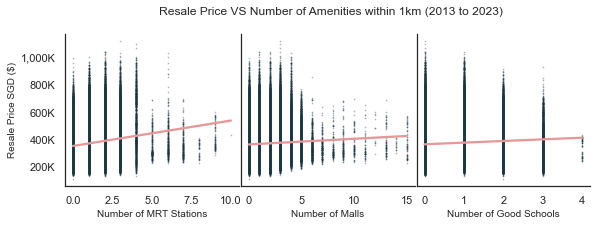

In [87]:
p=sns.pairplot(hdb_price_df_13_23, x_vars=['mrt_count_within_1km', 'mall_count_within_1km','good_sch_count_within_1km'], y_vars=['adjusted_price'], height=3, aspect=1, kind="reg", plot_kws=dict(scatter_kws=dict(s=0.5,alpha=0.3,color='#193441'), line_kws=dict(color='#e69798')))
axes=p.axes

ylabels = ['{:,.0f}'.format(x) + 'K' for x in axes[0,0].get_yticks()/1000]
axes[0,0].set_yticklabels(ylabels), axes[0,0].set_ylabel('Resale Price SGD ($)', size=10)
axes[0,0].set_xlabel('Number of MRT Stations', size=10)
axes[0,1].set_xlabel('Number of Malls', size=10)
axes[0,2].set_xlabel('Number of Good Schools', size=10)

plt.suptitle('Resale Price VS Number of Amenities within 1km (2013 to 2023)')

plt.tight_layout(pad=0, rect=[0, 0, 0.9, 0.9])
plt.show()

For Number of MRT Stations within 1km: 
- Strong and postiive correlation between Number of MRT stations within 1km and the respective HDB resale prices.

For Number of Malls within 1km:
- Weak and positive correlation 

For Number of Good Schools within 1km:
- Very weak (little to no) correlation 

## By Shortest Distance to MRT (in km)

In [88]:
hdb_price_df_13_23['shortest_dist_mrt'].max()

4.080782752857259

C:\Users\raych\AppData\Local\Temp\ipykernel_20760\1555978934.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  p.set_yticklabels(ylabels)


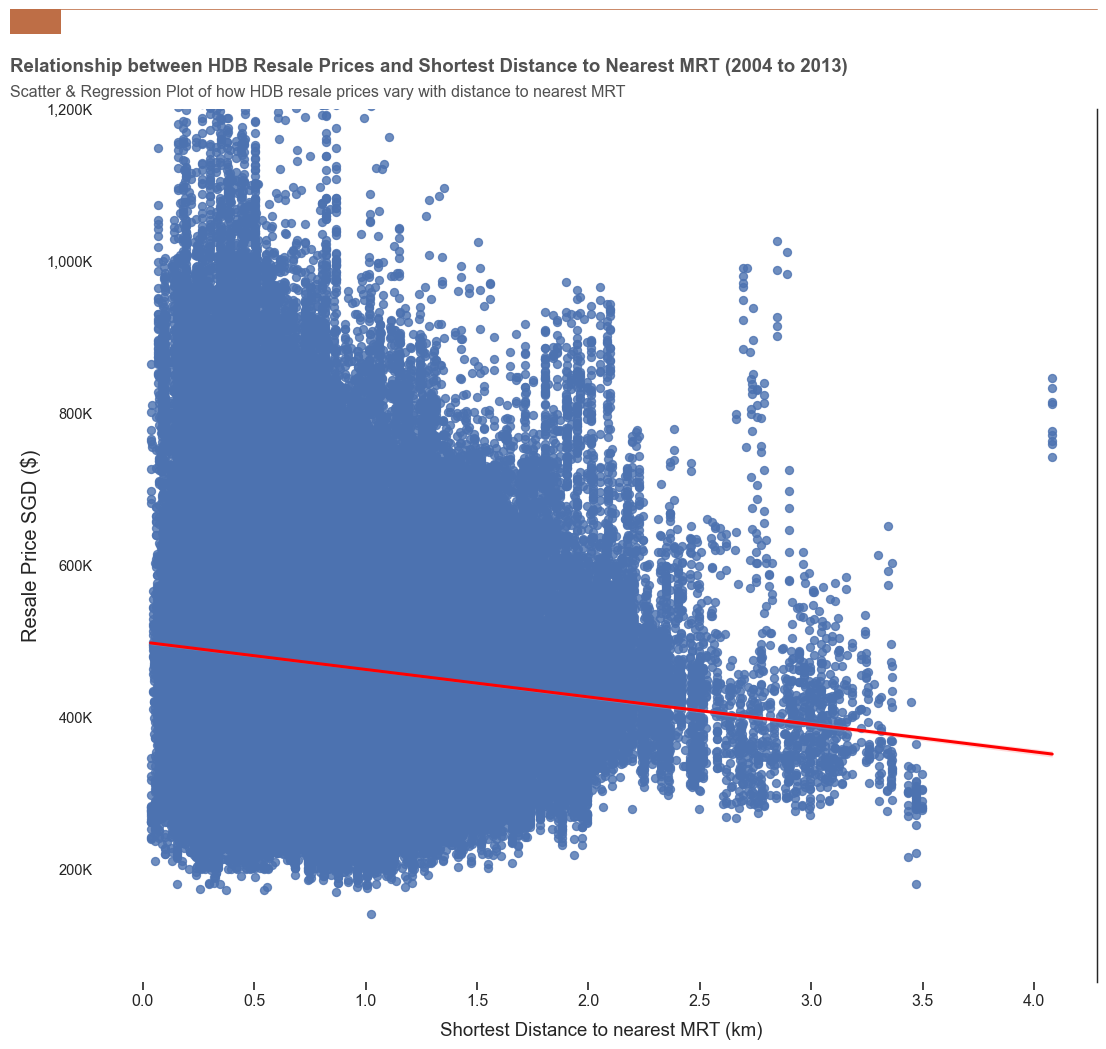

In [89]:
fig, ax = plt.subplots(figsize=(13.33, 13), dpi=96)


# 2004 to 2013
p=sns.regplot(x='shortest_dist_mrt', y='adjusted_price', data=hdb_price_df_13_23, line_kws={'color':'red'})


# Label x-axis and x ticks
ax.set_xlabel("Shortest Distance to nearest MRT (km)", fontsize=14, labelpad=10) 
ax.xaxis.set_tick_params(pad=2, labelbottom=True, bottom=True, labelsize=12, labelrotation=0)

# Reformat y-axis
p.set_ylabel('Resale Price SGD ($)', size=15)
ylabels = ['{:,.0f}'.format(x) + 'K' for x in p.get_yticks()/1000]
p.set_yticklabels(ylabels)
p.set_ylim([50000,1200000])

# Remove the spines
ax.spines[['top','left','bottom']].set_visible(False)

# Make the left spine thicker
ax.spines['right'].set_linewidth(1.1)

# Add in red line and rectangle on top
ax.plot([0.05, .9], [.98, .98], transform=fig.transFigure, clip_on=False, color='#BE6E46', linewidth=.6)
ax.add_patch(plt.Rectangle((0.05,.98), 0.04, -0.02, facecolor='#BE6E46', transform=fig.transFigure, clip_on=False, linewidth = 0))

# Add in title and subtitle
ax.text(x=0.05, y=.93, s="Relationship between HDB Resale Prices and Shortest Distance to Nearest MRT (2004 to 2013)", transform=fig.transFigure, ha='left', fontsize=14, weight='bold', alpha=.8)
ax.text(x=0.05, y=.91, s="Scatter & Regression Plot of how HDB resale prices vary with distance to nearest MRT", transform=fig.transFigure, ha='left', fontsize=12, alpha=.8)

# Adjust the margins around the plot area
plt.subplots_adjust(left=None, bottom=0.2, right=None, top=0.9, wspace=None, hspace=None)

plt.show()

general trend is that the further away the HDB is from the nearest MRT, it is associated with a decrease in its resale price. weirdly, some HDBs are more than 7km away from the nearest MRT have a relatively high resale price. Let's see which town(s) these HDBs belong to

In [90]:
hdb_price_df_13_23[hdb_price_df_13_23['shortest_dist_mrt'] > 7]['town'].unique()

array([], dtype=object)

before 2013, there was no nearby MRT in the Marina Parade area

## By Shortest Distance to MRT Name

In [91]:
hdb_price_df_13_23['shortest_dist_mrt_name'].nunique()

102

In [92]:
mrt_name_04_13 = hdb_price_df_13_23.groupby(['shortest_dist_mrt_name'], as_index=False).agg({'adjusted_price': 'median'}).sort_values('adjusted_price', ascending=True).reset_index(drop=True)
mrt_name_04_13

,shortest_dist_mrt_name,adjusted_price
0,Mattar MRT Station,262048.024215
1,Tai Seng MRT Station,267916.268590
2,MacPherson MRT Station,283245.999150
3,Changi Airport MRT Station,295989.550622
4,King Albert Park MRT Station,300178.488843
...,...,...
97,Joo Koon MRT Station,775444.591603
98,Beauty World MRT Station,800392.227506
99,Bendemeer MRT Station,824430.660155
100,Caldecott MRT Station,828480.682382


In [104]:
"""
fig, ax = plt.subplots(figsize=(13.33, 13), dpi=96)

lowest_price, highest_price = mrt_name_04_13['adjusted_price'].min(), mrt_name_04_13['adjusted_price'].max()
colors=['#e3dfda']*len(mrt_name_04_13)
# set to lowest and highest prices to red and green respectively
for index, row in mrt_name_04_13.iterrows():
    if row['adjusted_price'] == lowest_price:
        colors[index] = '#de425b'
    if row['adjusted_price'] == highest_price:
        colors[index] = '#488f31'

# Plot bars
bar1 = ax.barh(mrt_name_04_13['shortest_dist_mrt_name'], mrt_name_04_13['adjusted_price'],color=colors)

# Grid
ax.grid(which="major", axis='x', color='#DAD8D7', alpha=0.5, zorder=1)
ax.grid(which="major", axis='y', color='#DAD8D7', alpha=0.5, zorder=1)

# Label x-axis and x ticks
ax.set_xlabel("Percentage Change in Median Resale Prices (%)", fontsize=12, labelpad=10) 
#ax.xaxis.set_label_position("bottom")
#ax.xaxis.set_major_formatter(lambda s, i : f'{s:,.0f}')
#ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.xaxis.set_tick_params(pad=2, labelbottom=True, bottom=True, labelsize=12, labelrotation=0)
# labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
# ax.set_xticks(delay_by_month['Month'], labels) # Map integers numbers from the series to labels list

# Reformat y-axis
#ax.set_ylabel('Town', fontsize=12, labelpad=10)
#ax.yaxis.set_label_position("left")
# ax.yaxis.set_major_formatter(lambda s, i : f'{s:,.0f}')
# ax.yaxis.set_major_locator(MaxNLocator(integer=True))
# ax.yaxis.set_tick_params(pad=2, labeltop=False, labelbottom=True, bottom=False, labelsize=12)

# Add label on top of each bar
ax.bar_label(bar1, labels=[f'{e:,.0f}' for e in mrt_name_04_13['adjusted_price']], padding=3, color='black', fontsize=10) 

# Remove the spines
ax.spines[['top','left','bottom']].set_visible(False)

# Make the left spine thicker
ax.spines['right'].set_linewidth(1.1)

# Add in red line and rectangle on top
ax.plot([0.05, .9], [.98, .98], transform=fig.transFigure, clip_on=False, color='#BE6E46', linewidth=.6)
ax.add_patch(plt.Rectangle((0.05,.98), 0.04, -0.02, facecolor='#BE6E46', transform=fig.transFigure, clip_on=False, linewidth = 0))

# Add in title and subtitle
ax.text(x=0.05, y=.93, s="2021 vs 2022: Percentage Change of HDB Resale Prices by Town", transform=fig.transFigure, ha='left', fontsize=14, weight='bold', alpha=.8)
ax.text(x=0.05, y=.91, s="How HDB resale prices changed in the past two years, based on the town's median price", transform=fig.transFigure, ha='left', fontsize=12, alpha=.8)

# Adjust the margins around the plot area
plt.subplots_adjust(left=None, bottom=0.2, right=None, top=0.9, wspace=None, hspace=None)


plt.show()
"""

'\nfig, ax = plt.subplots(figsize=(13.33, 13), dpi=96)\n\nlowest_price, highest_price = mrt_name_04_13[\'adjusted_price\'].min(), mrt_name_04_13[\'adjusted_price\'].max()\ncolors=[\'#e3dfda\']*len(mrt_name_04_13)\n# set to lowest and highest prices to red and green respectively\nfor index, row in mrt_name_04_13.iterrows():\n    if row[\'adjusted_price\'] == lowest_price:\n        colors[index] = \'#de425b\'\n    if row[\'adjusted_price\'] == highest_price:\n        colors[index] = \'#488f31\'\n\n# Plot bars\nbar1 = ax.barh(mrt_name_04_13[\'shortest_dist_mrt_name\'], mrt_name_04_13[\'adjusted_price\'],color=colors)\n\n# Grid\nax.grid(which="major", axis=\'x\', color=\'#DAD8D7\', alpha=0.5, zorder=1)\nax.grid(which="major", axis=\'y\', color=\'#DAD8D7\', alpha=0.5, zorder=1)\n\n# Label x-axis and x ticks\nax.set_xlabel("Percentage Change in Median Resale Prices (%)", fontsize=12, labelpad=10) \n#ax.xaxis.set_label_position("bottom")\n#ax.xaxis.set_major_formatter(lambda s, i : f\'{s:,.0f

## By Shortest Mall Distance

C:\Users\raych\AppData\Local\Temp\ipykernel_20760\4058245314.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  p.set_yticklabels(ylabels)


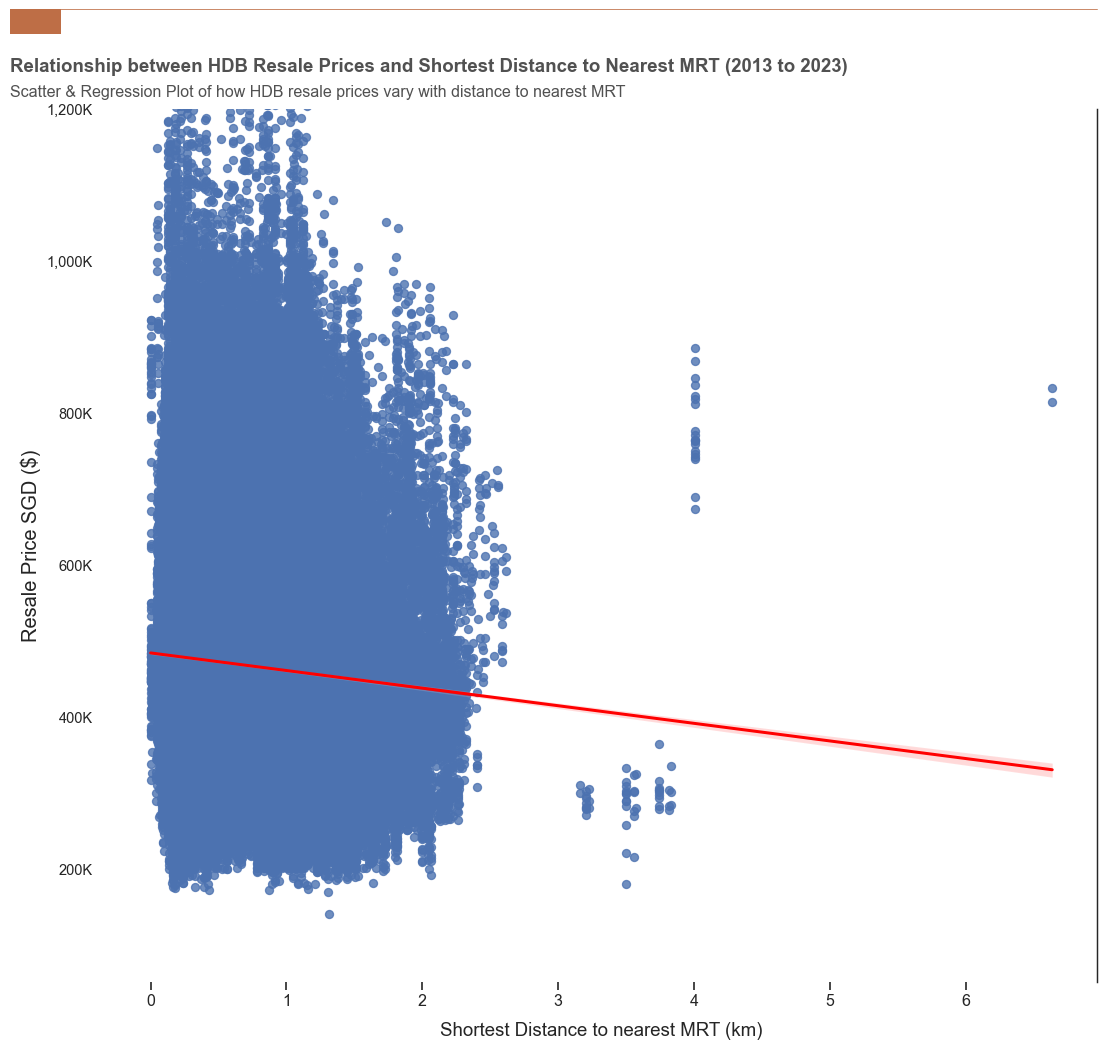

In [103]:
fig, ax = plt.subplots(figsize=(13.33, 13), dpi=96)

# 2004 to 2013
p=sns.regplot(x='shortest_dist_mall', y='adjusted_price', data=hdb_price_df_13_23, line_kws={'color':'red'})


# Label x-axis and x ticks
ax.set_xlabel("Shortest Distance to nearest MRT (km)", fontsize=14, labelpad=10) 
ax.xaxis.set_tick_params(pad=2, labelbottom=True, bottom=True, labelsize=12, labelrotation=0)

# Reformat y-axis
p.set_ylabel('Resale Price SGD ($)', size=15)
ylabels = ['{:,.0f}'.format(x) + 'K' for x in p.get_yticks()/1000]
p.set_yticklabels(ylabels)
p.set_ylim([50000,1200000])

# Remove the spines
ax.spines[['top','left','bottom']].set_visible(False)

# Make the left spine thicker
ax.spines['right'].set_linewidth(1.1)

# Add in red line and rectangle on top
ax.plot([0.05, .9], [.98, .98], transform=fig.transFigure, clip_on=False, color='#BE6E46', linewidth=.6)
ax.add_patch(plt.Rectangle((0.05,.98), 0.04, -0.02, facecolor='#BE6E46', transform=fig.transFigure, clip_on=False, linewidth = 0))

# Add in title and subtitle
ax.text(x=0.05, y=.93, s="Relationship between HDB Resale Prices and Shortest Distance to Nearest MRT (2013 to 2023)", transform=fig.transFigure, ha='left', fontsize=14, weight='bold', alpha=.8)
ax.text(x=0.05, y=.91, s="Scatter & Regression Plot of how HDB resale prices vary with distance to nearest MRT", transform=fig.transFigure, ha='left', fontsize=12, alpha=.8)

# Adjust the margins around the plot area
plt.subplots_adjust(left=None, bottom=0.2, right=None, top=0.9, wspace=None, hspace=None)

plt.show()

## By Nearest School & Name

## By Good Schools Score

In [95]:
hdb_price_df['good_sch_score'].unique()

array([3, 4, 1, 0, 2], dtype=int64)

C:\Users\raych\AppData\Local\Temp\ipykernel_20760\3768339060.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  p.set_yticklabels(ylabels)


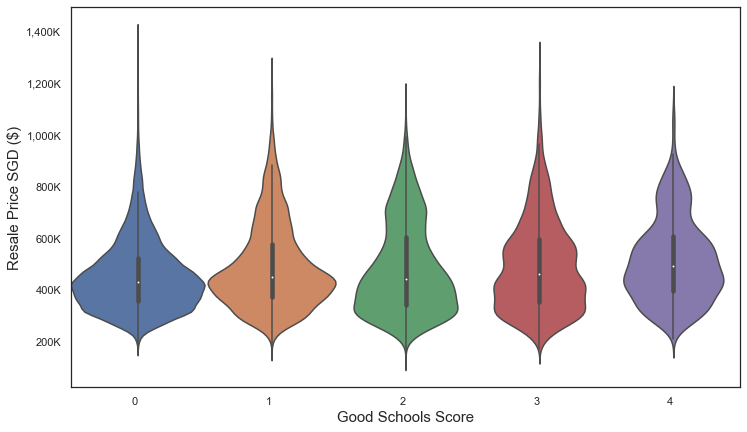

In [96]:
# 2003 to 2013
fig = plt.figure(figsize=(12,7))
p=sns.violinplot(x='good_sch_score', y='adjusted_price', data=hdb_price_df_13_23, width=1,
                order=hdb_price_df_13_23.groupby('good_sch_score')['adjusted_price'].median().reset_index()['good_sch_score'].tolist())
p.set_xticklabels(p.get_xticklabels(), rotation=0, ha='right')
p.set_xlabel('Good Schools Score', size=15)
ylabels = ['{:,.0f}'.format(x) + 'K' for x in p.get_yticks()/1000]
p.set_yticklabels(ylabels)
p.set_ylabel('Resale Price SGD ($)', size=15)
plt.show()

C:\Users\raych\AppData\Local\Temp\ipykernel_20760\2518008868.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  p.set_yticklabels(ylabels)


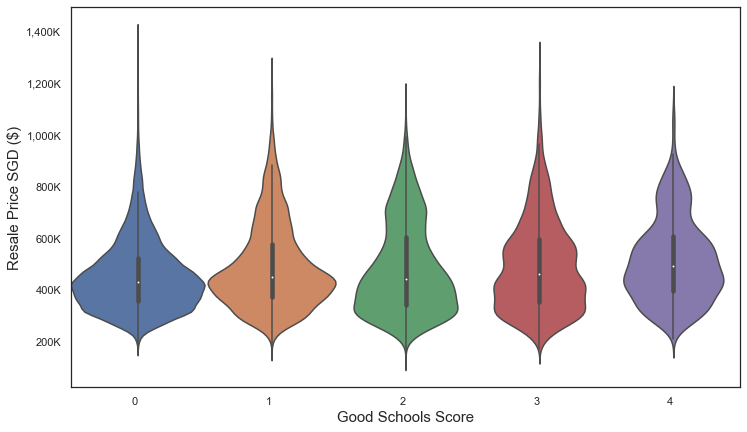

In [97]:
# 2013 to 2023
fig = plt.figure(figsize=(12,7))
p=sns.violinplot(x='good_sch_score', y='adjusted_price', data=hdb_price_df_13_23, width=1,
                order=hdb_price_df_13_23.groupby('good_sch_score')['adjusted_price'].median().reset_index()['good_sch_score'].tolist())
p.set_xticklabels(p.get_xticklabels(), rotation=0, ha='right')
p.set_xlabel('Good Schools Score', size=15)
ylabels = ['{:,.0f}'.format(x) + 'K' for x in p.get_yticks()/1000]
p.set_yticklabels(ylabels)
p.set_ylabel('Resale Price SGD ($)', size=15)
plt.show()

the scoring of good schools near to HDB does not seem to be correlated with its resale price.

## By Distance to CBD 

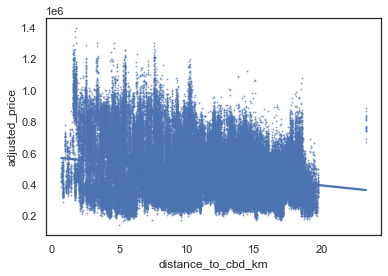

In [98]:
hdb_price_df['distance_to_cbd_km']
# 2013 to 2023
sns.regplot(x='distance_to_cbd_km', y='adjusted_price', data=hdb_price_df_13_23, scatter_kws={"s": 1, 'alpha':0.5})
plt.show()

C:\Users\raych\AppData\Local\Temp\ipykernel_20760\3759935563.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  p.set_yticklabels(ylabels)


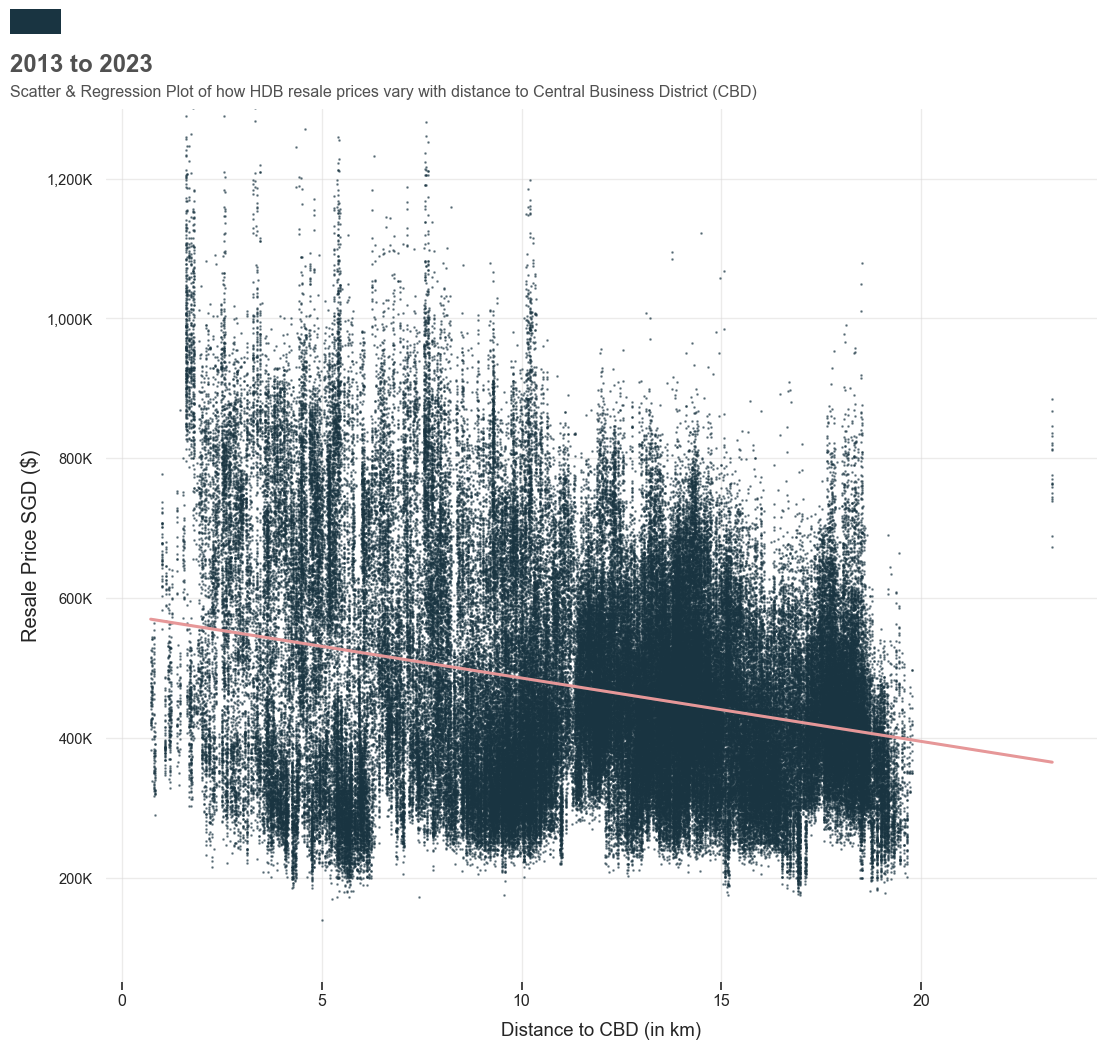

In [99]:
fig, ax = plt.subplots(figsize=(13.33, 13), dpi=96)

# Grid
ax.grid(which="major", axis='x', color='#DAD8D7', alpha=0.5, zorder=1)
ax.grid(which="major", axis='y', color='#DAD8D7', alpha=0.5, zorder=1)

# 2004 to 2013
p=sns.regplot(x='distance_to_cbd_km', y='adjusted_price', data=hdb_price_df_13_23, color='#e69798', scatter_kws={"s": 1, 'alpha':0.5, 'color':'#193441'})

# Label x-axis and x ticks
ax.set_xlabel("Distance to CBD (in km)", fontsize=14, labelpad=10) 
ax.xaxis.set_tick_params(pad=2, labelbottom=True, bottom=True, labelsize=12, labelrotation=0)

# Reformat y-axis
p.set_ylabel('Resale Price SGD ($)', size=15)
ylabels = ['{:,.0f}'.format(x) + 'K' for x in p.get_yticks()/1000]
p.set_yticklabels(ylabels)
p.set_ylim([50000,1300000])

# Remove the spines
ax.spines[['top','left','bottom','right']].set_visible(False)

# Make the left spine thicker
# ax.spines['right'].set_linewidth(1.1)

# Add in red line and rectangle on top
# ax.plot([0.05, .9], [.98, .98], transform=fig.transFigure, clip_on=False, color='#193441', linewidth=.6)
ax.add_patch(plt.Rectangle((0.05,.98), 0.04, -0.02, facecolor='#193441', transform=fig.transFigure, clip_on=False, linewidth = 0))

# Add in title and subtitle
ax.text(x=0.05, y=.93, s="2013 to 2023", transform=fig.transFigure, ha='left', fontsize=18, weight='bold', alpha=.8)
ax.text(x=0.05, y=.91, s="Scatter & Regression Plot of how HDB resale prices vary with distance to Central Business District (CBD)", transform=fig.transFigure, ha='left', fontsize=12, alpha=.8)

# Adjust the margins around the plot area
plt.subplots_adjust(left=None, bottom=0.2, right=None, top=0.9, wspace=None, hspace=None)

plt.show()

## By Maturity

In [100]:
hdb_price_df['matured'].unique()

array([1, 0], dtype=int64)

C:\Users\raych\AppData\Local\Temp\ipykernel_20760\2538326955.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  p.set_yticklabels(ylabels)


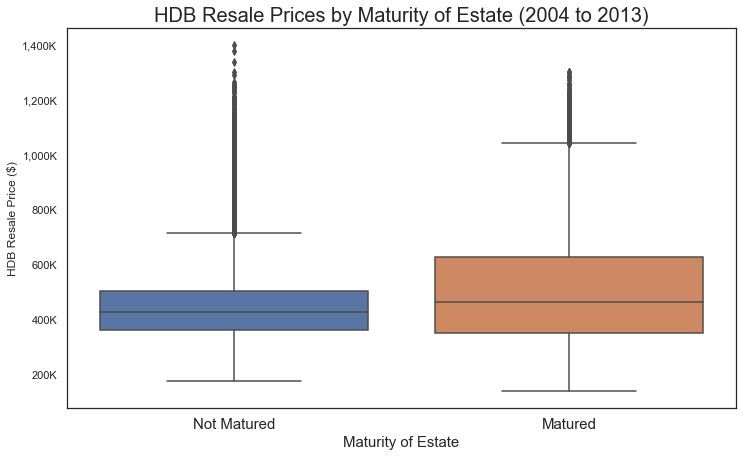

In [101]:
fig=plt.figure(figsize=(12,7))
p = sns.boxplot(x='matured', y='adjusted_price', data = hdb_price_df_13_23)
p.set_xticklabels(['Not Matured', 'Matured'], size = 15)
p.set_xlabel('Maturity of Estate', size=15)
p.set_title('HDB Resale Prices by Maturity of Estate (2004 to 2013)', size=20)
ylabels = ['{:,.0f}'.format(x) + 'K' for x in p.get_yticks()/1000]
p.set_yticklabels(ylabels)
p.set_ylabel('HDB Resale Price ($)')
# sns.despine(left=True)
plt.show()

C:\Users\raych\AppData\Local\Temp\ipykernel_20760\3161313683.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  p.set_yticklabels(ylabels)


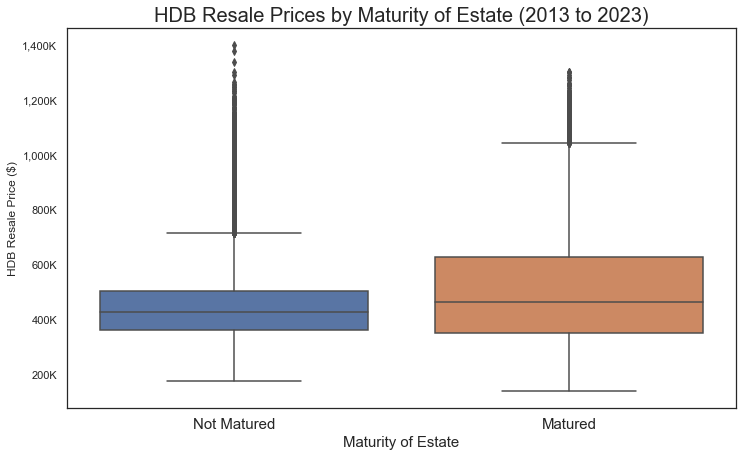

In [102]:
fig=plt.figure(figsize=(12,7))
p = sns.boxplot(x='matured', y='adjusted_price', data = hdb_price_df_13_23)
p.set_xticklabels(['Not Matured', 'Matured'], size = 15)
p.set_xlabel('Maturity of Estate', size=15)
p.set_title('HDB Resale Prices by Maturity of Estate (2013 to 2023)', size=20)
ylabels = ['{:,.0f}'.format(x) + 'K' for x in p.get_yticks()/1000]
p.set_yticklabels(ylabels)
p.set_ylabel('HDB Resale Price ($)')
# sns.despine(left=True)
plt.show()

Not much visible association between maturity of estates and resale prices.